**Importing Libraries**

In [1]:
 !pip install optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


**Loading Dataset**

In [2]:
df1 = pd.read_csv('/content/Overall Dataset.csv')

In [3]:
columns = df1.columns.unique()
print(columns)

Index(['S.No', 'Cell_Line', 'Drug_Name', 'Pubchem_CID', '#stars', '#amine',
       '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW',
       'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB',
       'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16',
       'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG',
       'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)',
       '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
       'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
       'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
       'RuleOfThree', 'Jm', 'Labels'],
      dtype='object')


In [4]:
statistics = df1.describe()
statistics

S.No       #stars       #amine     #amidine        #acid  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000   
mean    176.690517     1.182283     0.389551     0.009654     0.085179   
std     101.858286     2.388239     0.601498     0.097805     0.371746   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      89.000000     0.000000     0.000000     0.000000     0.000000   
50%     177.000000     0.000000     0.000000     0.000000     0.000000   
75%     265.000000     1.000000     1.000000     0.000000     0.000000   
max     366.000000    18.000000     3.000000     1.000000     4.000000   

            #amide       #rotor       #rtvFG          CNS       mol_MW  ...  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000  ...   
mean      0.211244     6.139693     0.401476    -0.830778   437.369601  ...   
std       0.752049     4.407872     0.869677     1.166671   139.355083  ...   
min       0.000000     0.000000     0.000000    -2.000000   123.111000  ...   
25%       0.000000     3.000000     0.000000    -2.000000   361.486000  ...   
50%       0.000000     5.000000     0.000000    -1.000000   432.377000  ...   
75%       0.000000     8.000000     1.000000     0.000000   499.543000  ...   
max       8.000000    35.000000     7.000000     2.000000  1255.432000  ...   

               PSA       #NandO   RuleOfFive   #ringatoms        #in34  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000   
mean    102.540793     7.357183     0.558773    20.512777     0.264622   
std      41.293828     2.872512     0.859495     7.634400     0.941676   
min      13.663000     1.000000     0.000000     0.000000     0.000000   
25%      78.264000     6.000000     0.000000    15.000000     0.000000   
50%      96.248000     7.000000     0.000000    21.000000     0.000000   
75%     117.570000     9.000000     1.000000    25.000000     0.000000   
max     351.694000    28.000000     3.000000    45.000000     6.000000   

             #in56      #noncon     #nonHatm  RuleOfThree           Jm  
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000  
mean     19.971039     3.291312    30.914253     0.599659     5.176886  
std       7.687339     3.928448    10.033921     0.687866    80.205053  
min       0.000000     0.000000     9.000000     0.000000     0.000000  
25%      15.000000     0.000000    26.000000     0.000000     0.000000  
50%      21.000000     3.000000    30.000000     1.000000     0.002000  
75%      24.000000     5.000000    35.000000     1.000000     0.021000  
max      45.000000    26.000000    90.000000     3.000000  1499.233000  

[8 rows x 52 columns]

**Encoding**

In [5]:
Ll = LabelEncoder()
df1['Labels'] = Ll.fit_transform(df1['Labels'])
print("Labels",df1['Labels'].unique())
print(Ll.inverse_transform(list(df1['Labels'].unique())))
print()

Labels [0 1]
['Active' 'Inactive']



In [6]:
Ll = LabelEncoder()
df1['Cell_Line'] = Ll.fit_transform(df1['Cell_Line'])
print("Cell_Line",df1['Cell_Line'].unique())
print(Ll.inverse_transform(list(df1['Cell_Line'].unique())))
print()

Cell_Line [1 2 3 4 0]
['HCC-78' 'NCI-H322' 'NCI-H358' 'NCI-H522' 'CaLu-06']



In [7]:
df1 = df1.drop('S.No', axis=1)
df1 = df1.drop('Pubchem_CID',axis=1)
df1 = df1.drop('Drug_Name',axis=1)

**`Visualizations `**

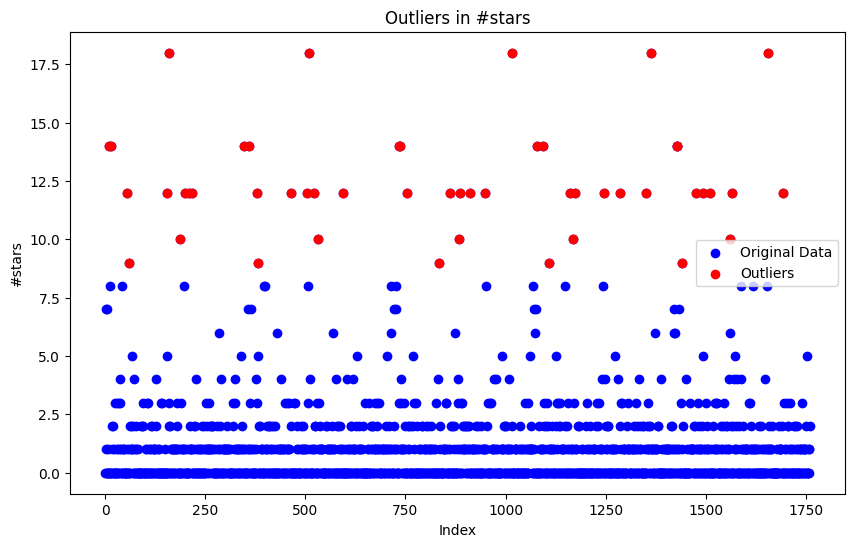

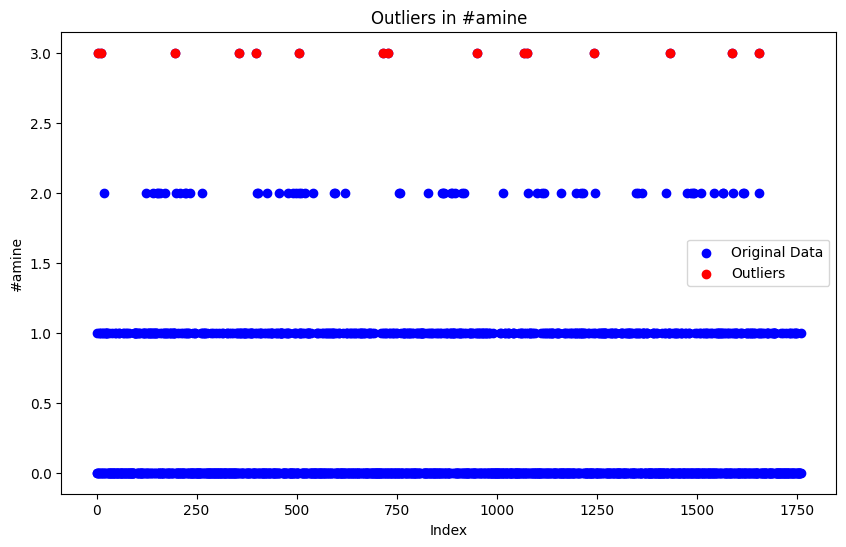

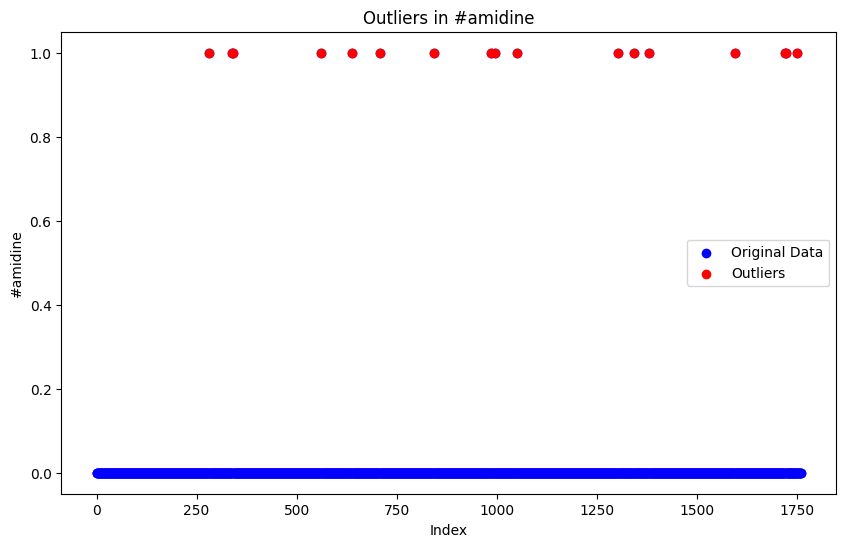

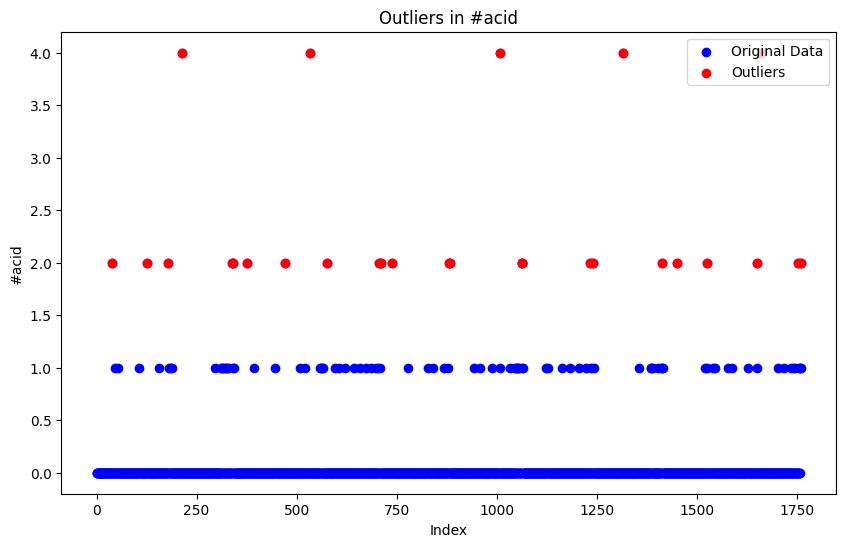

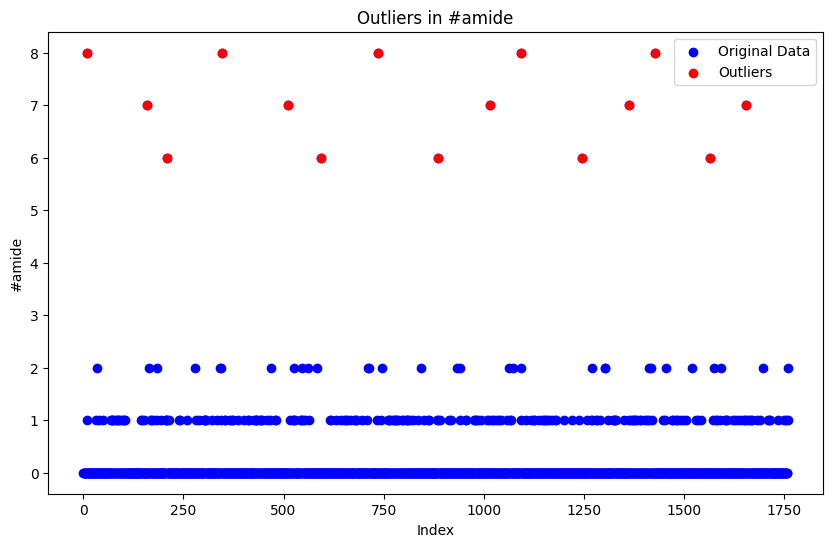

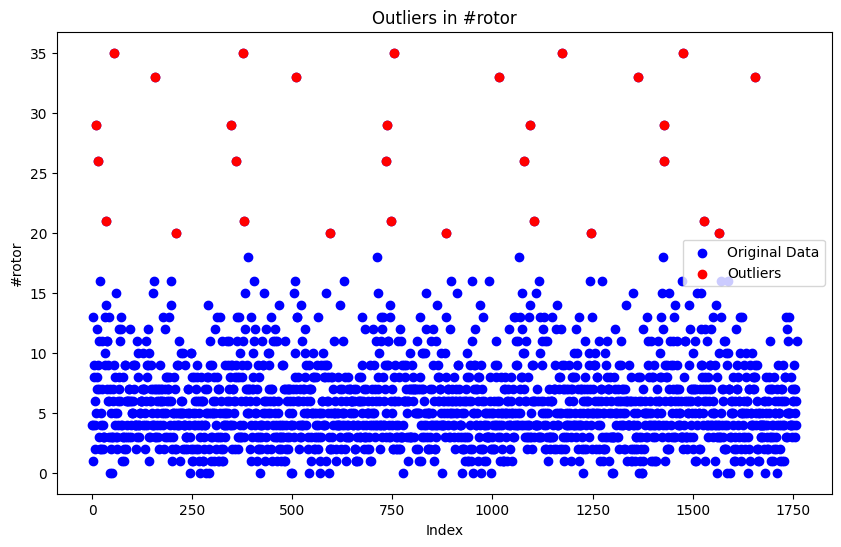

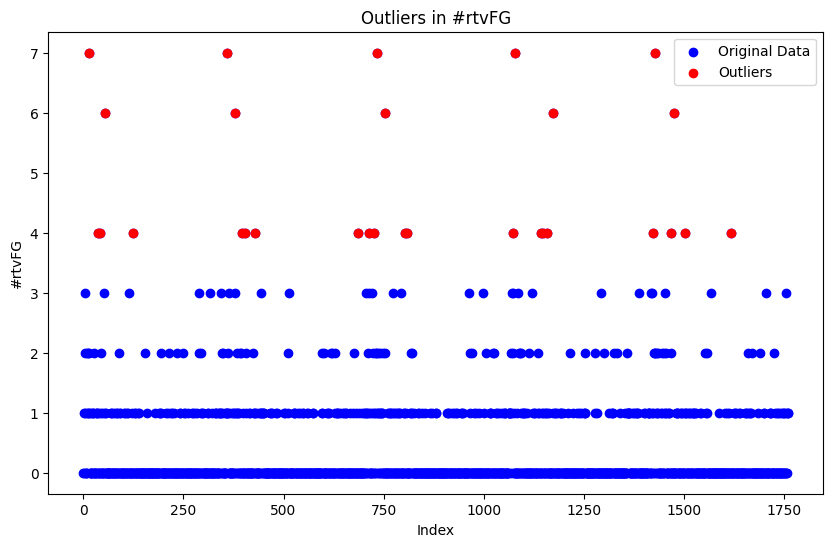

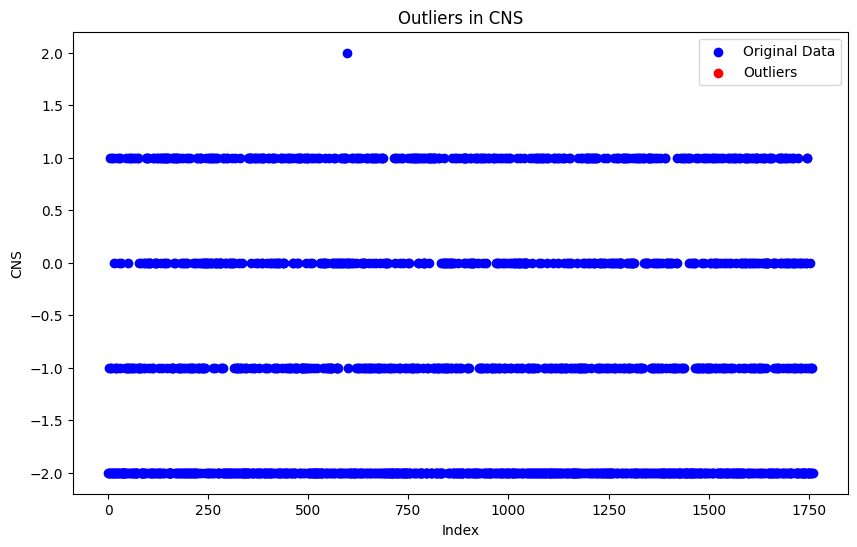

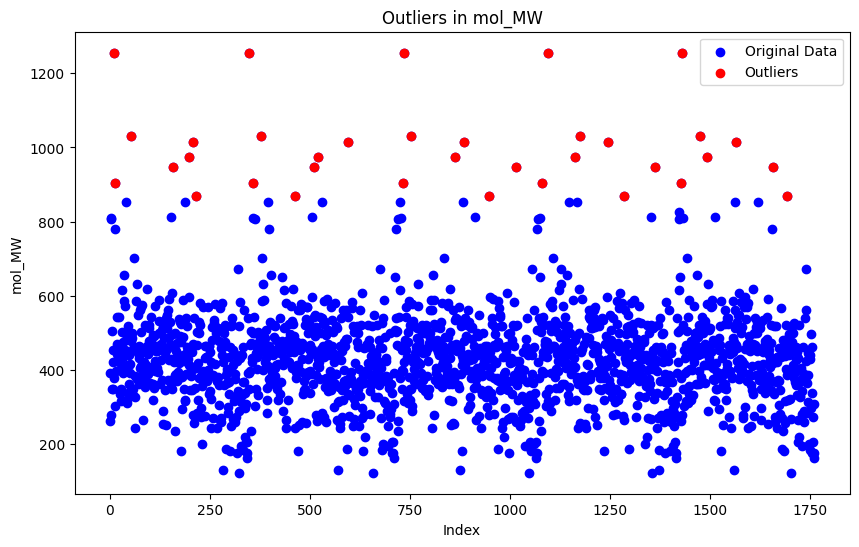

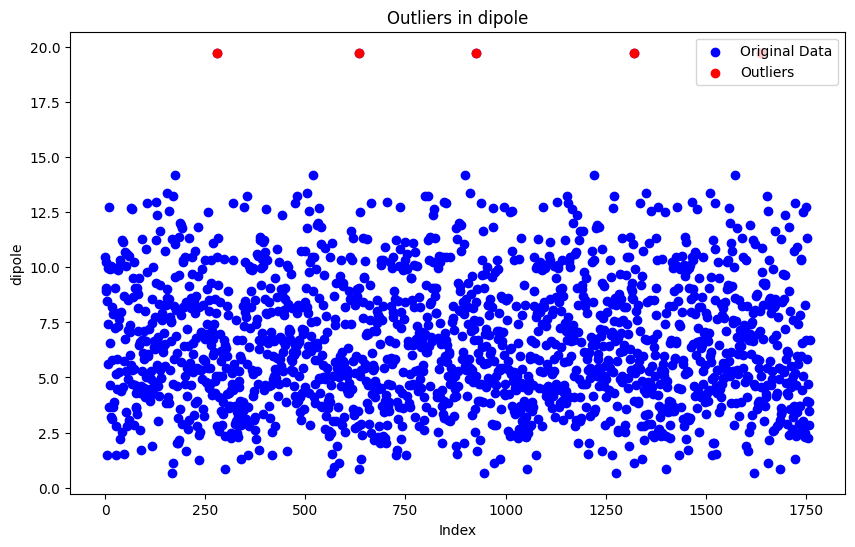

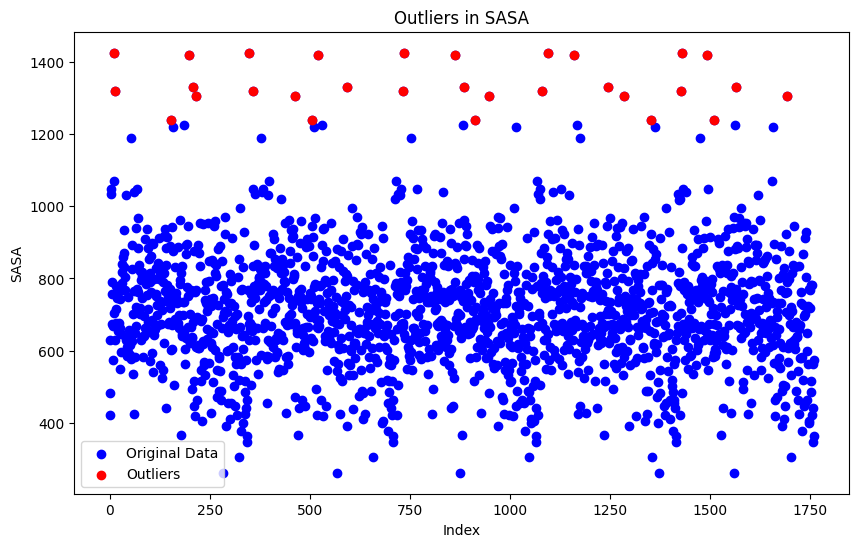

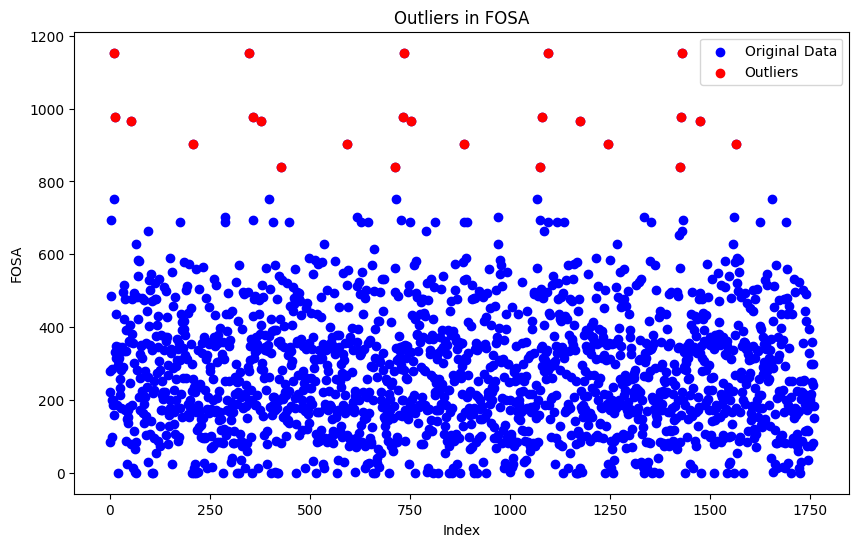

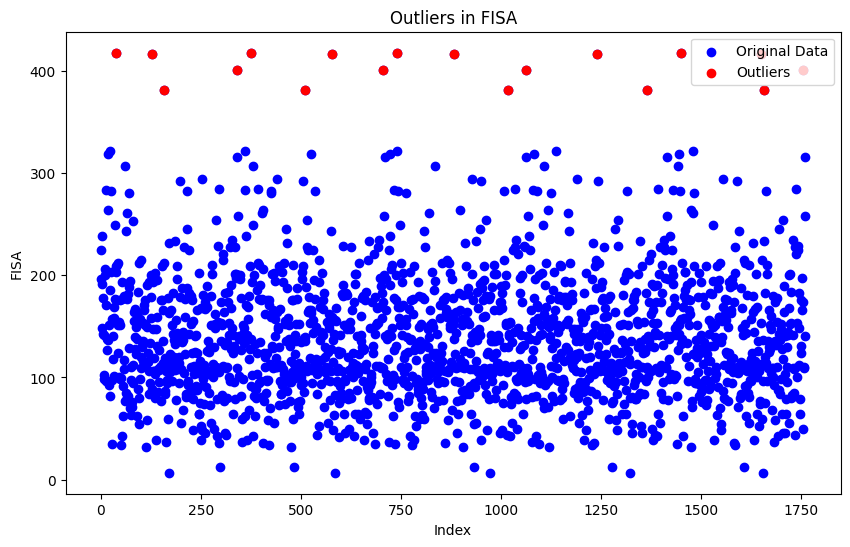

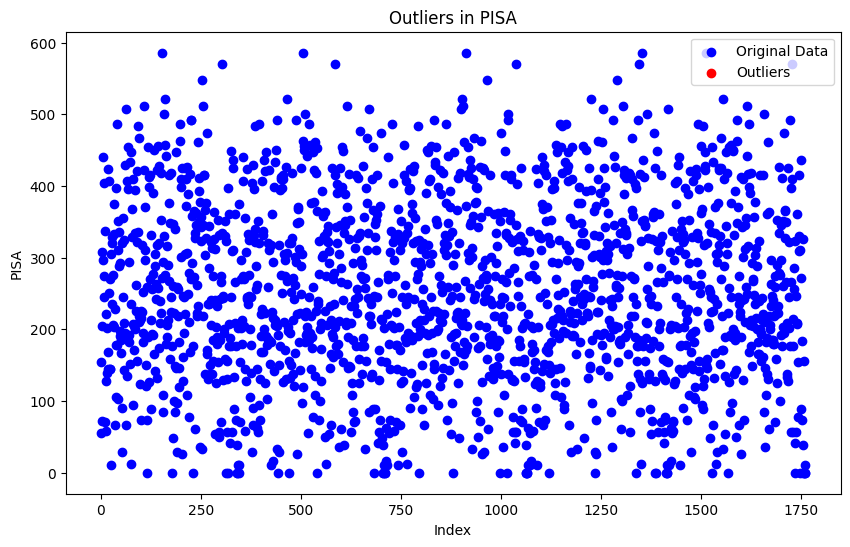

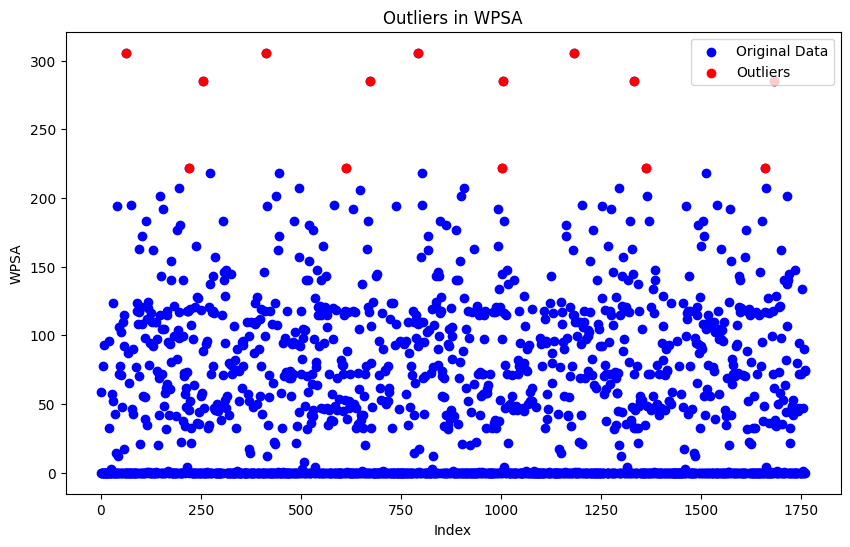

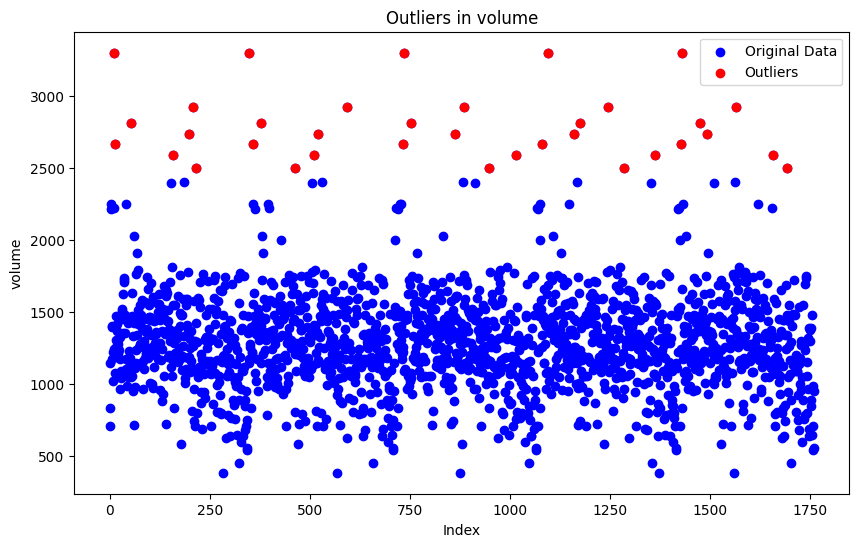

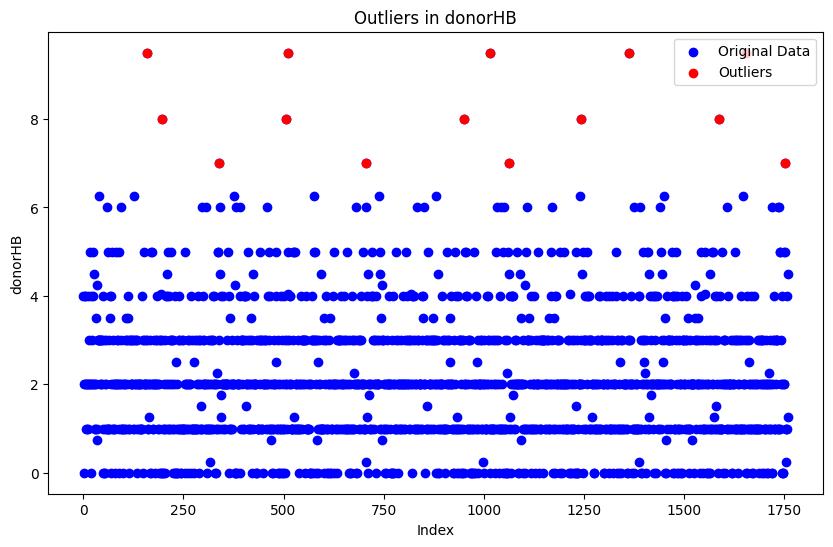

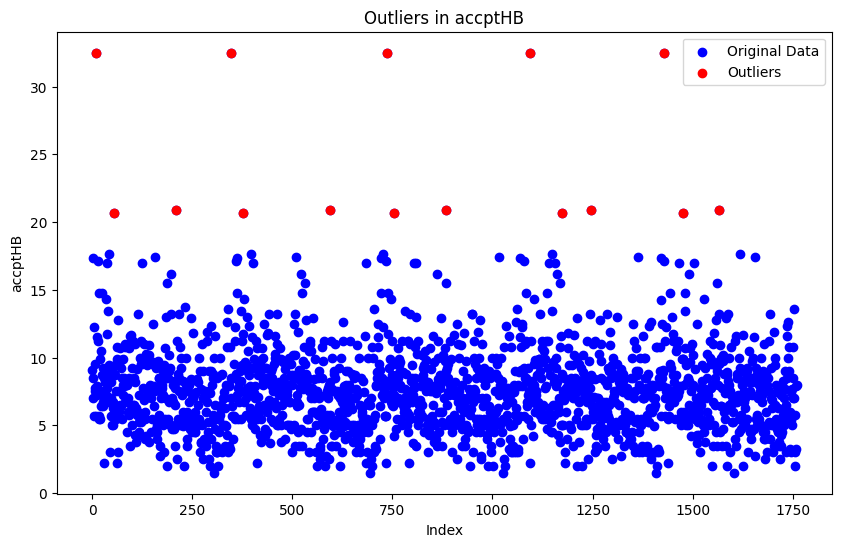

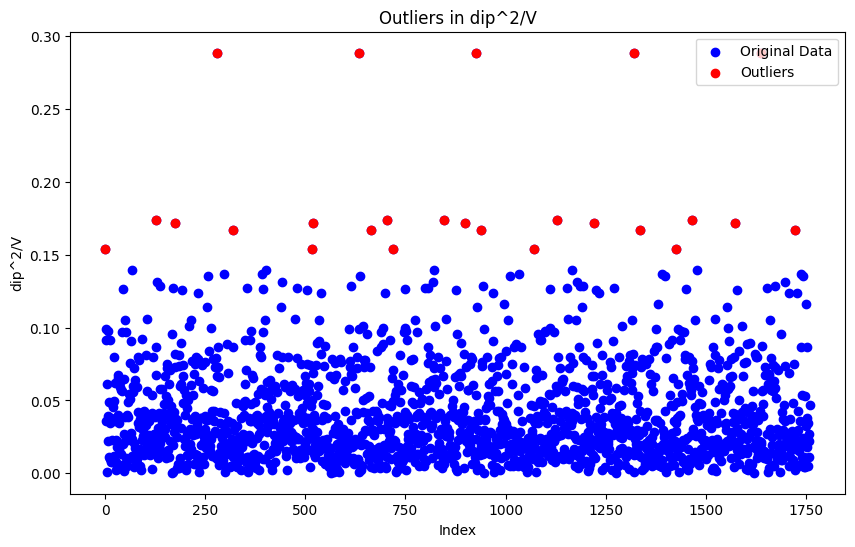

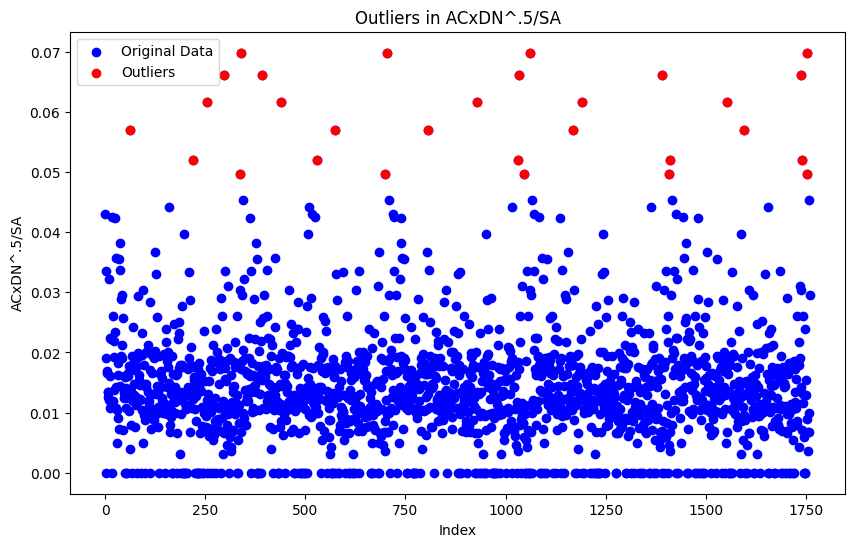

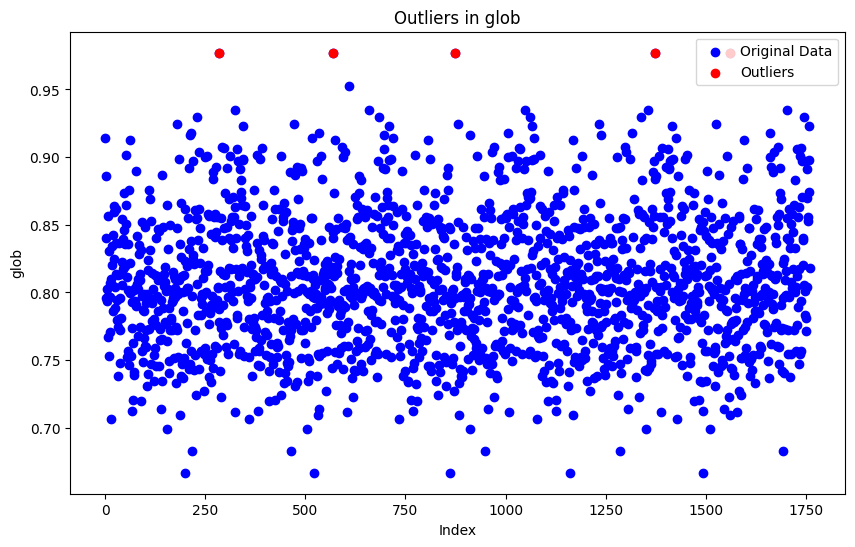

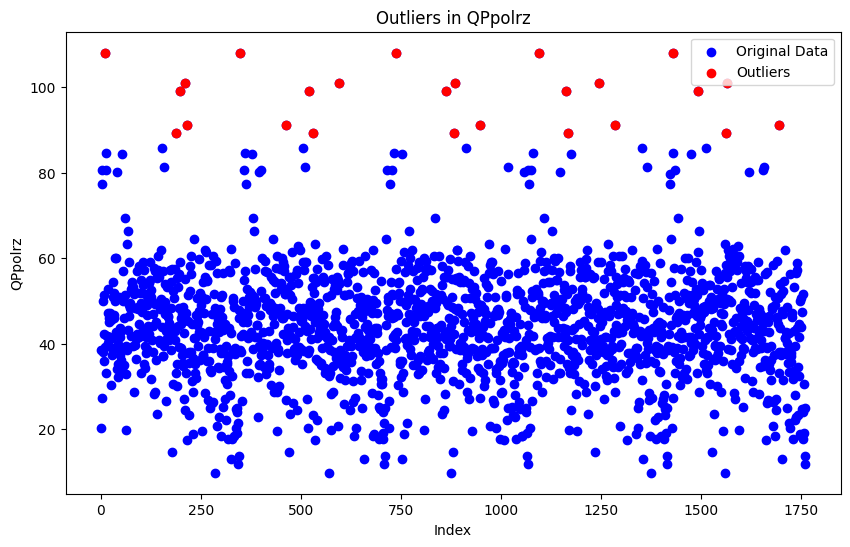

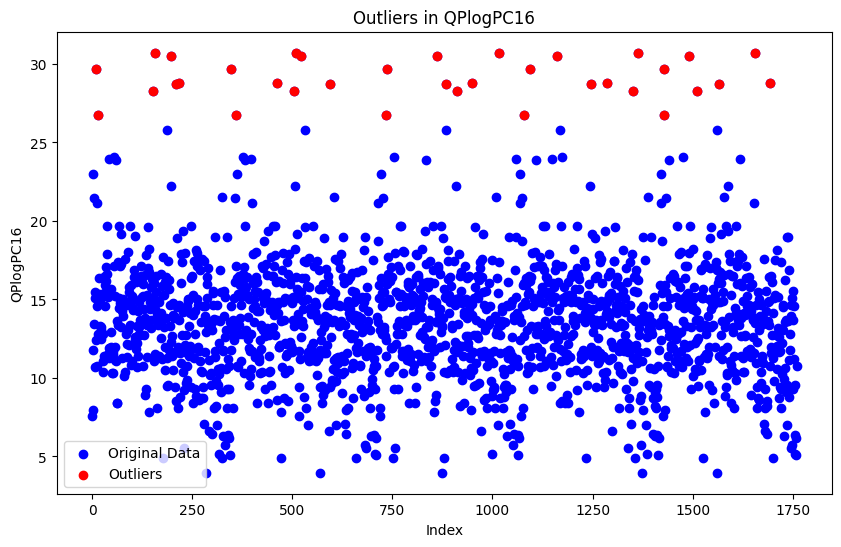

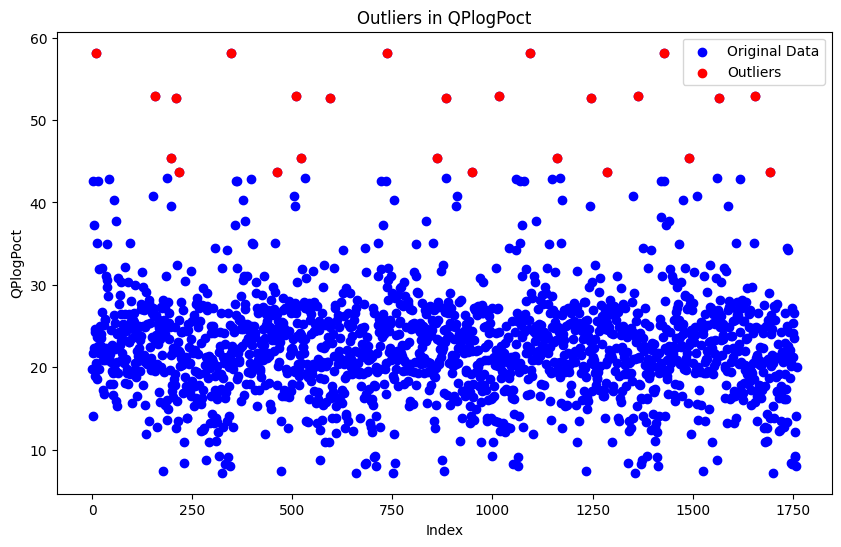

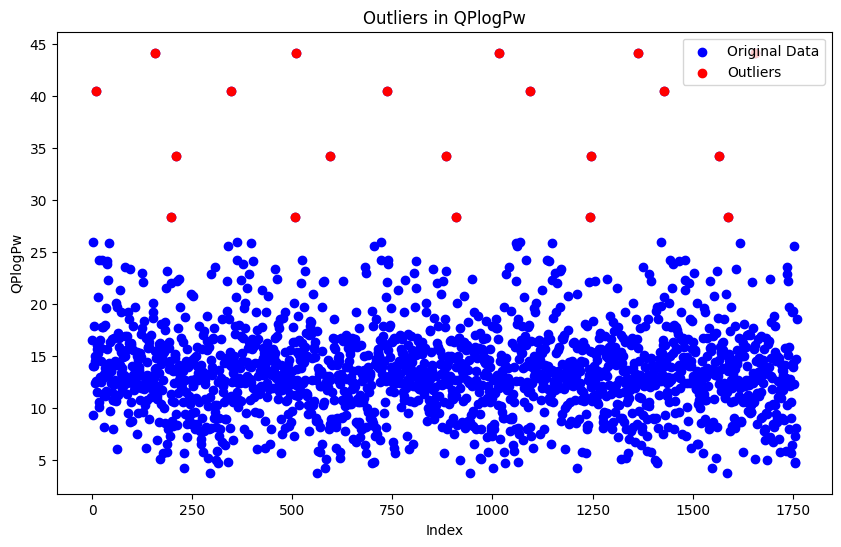

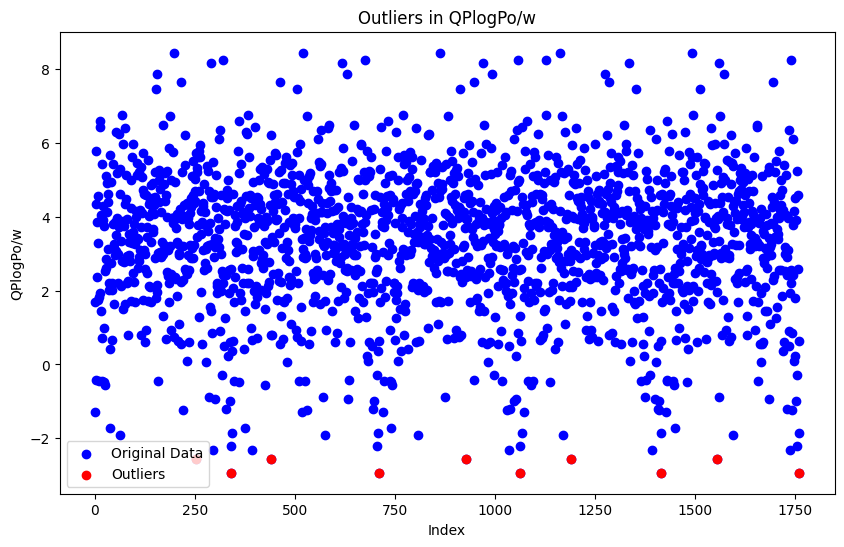

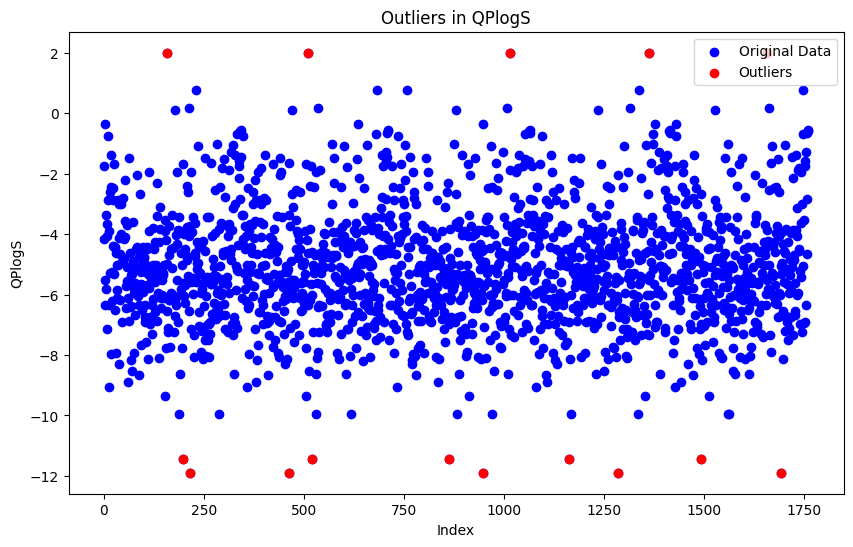

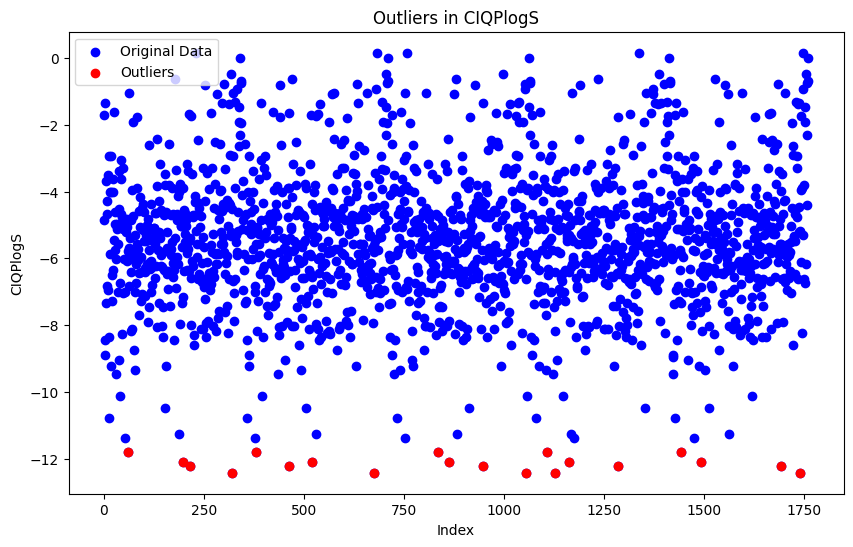

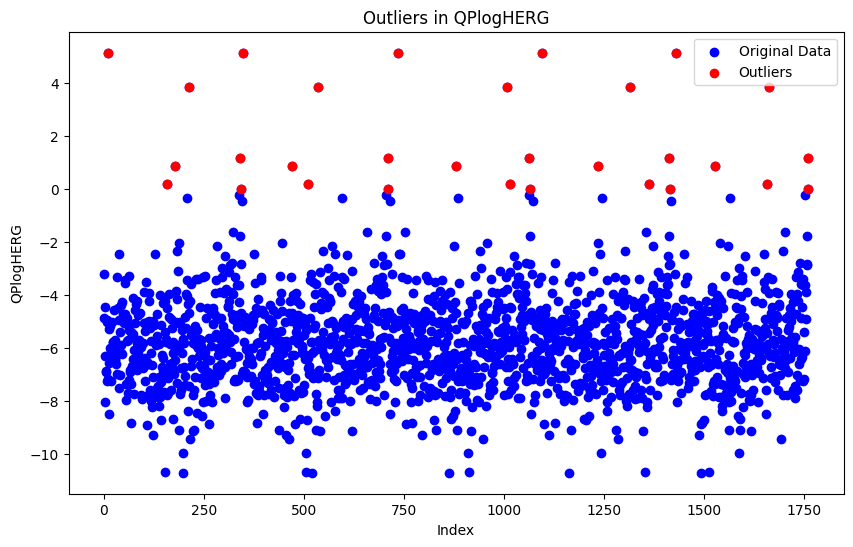

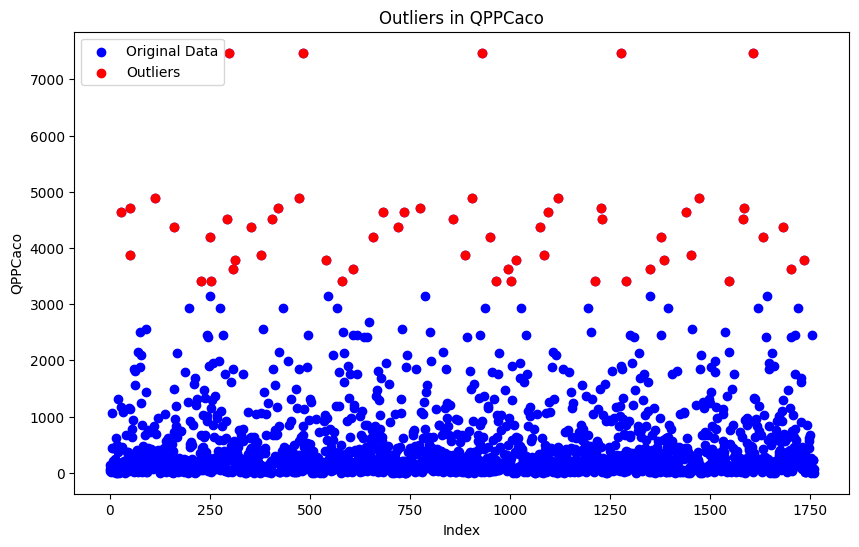

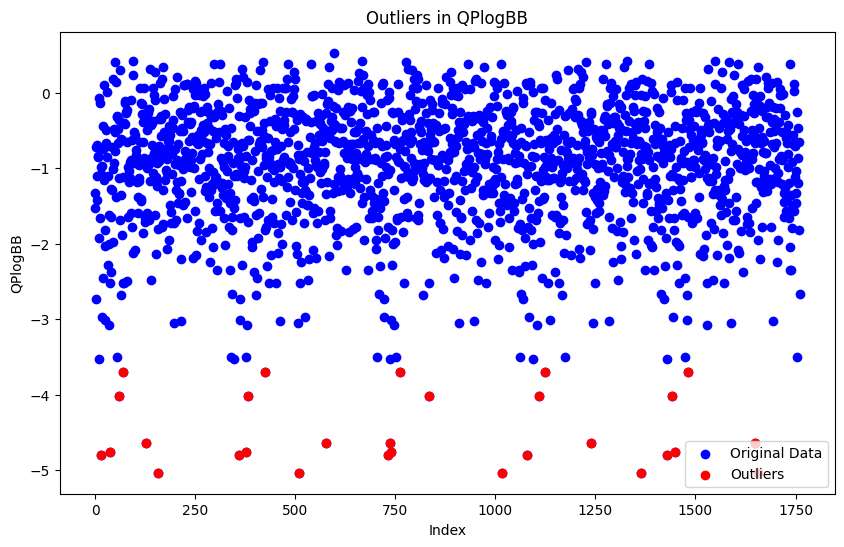

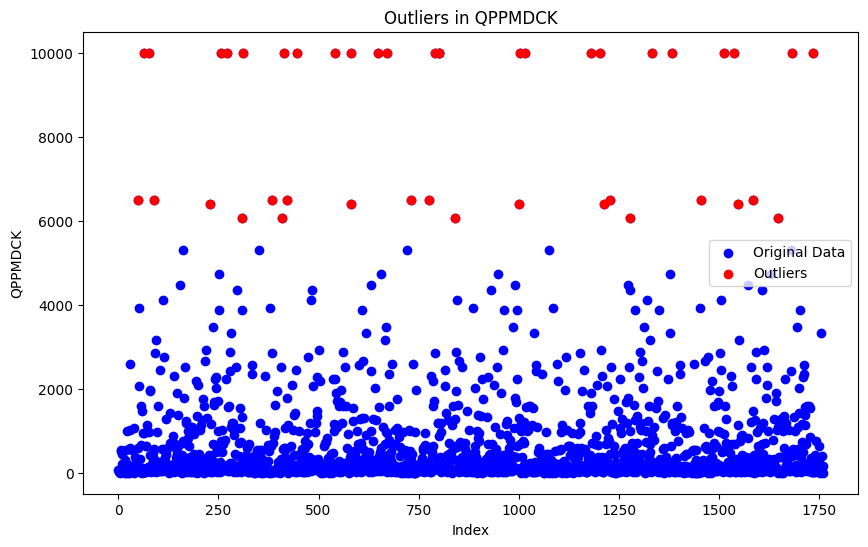

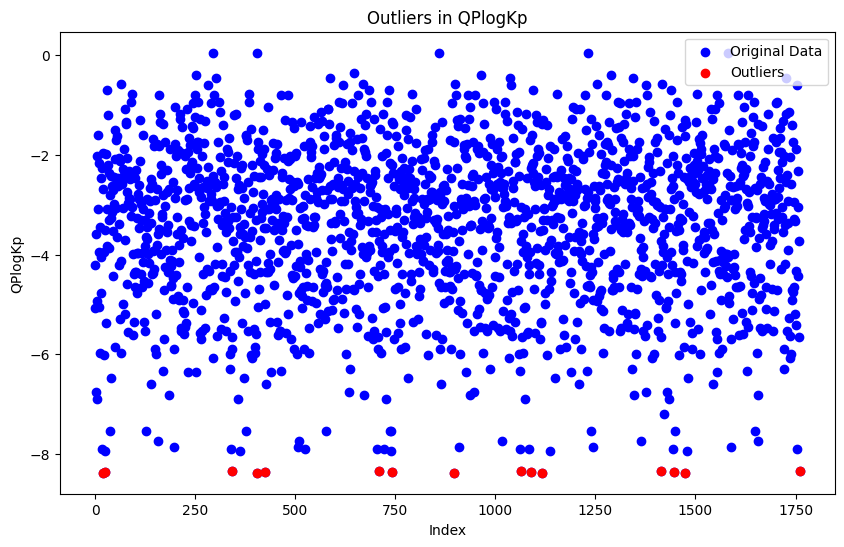

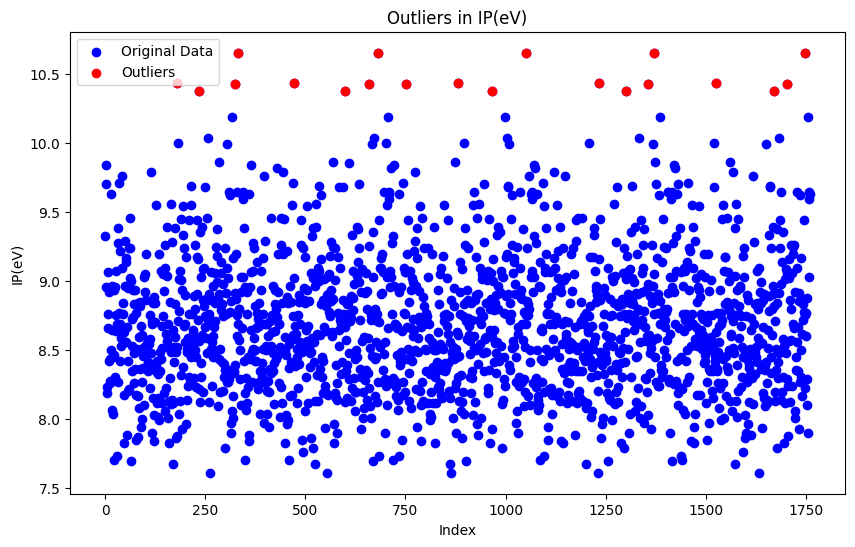

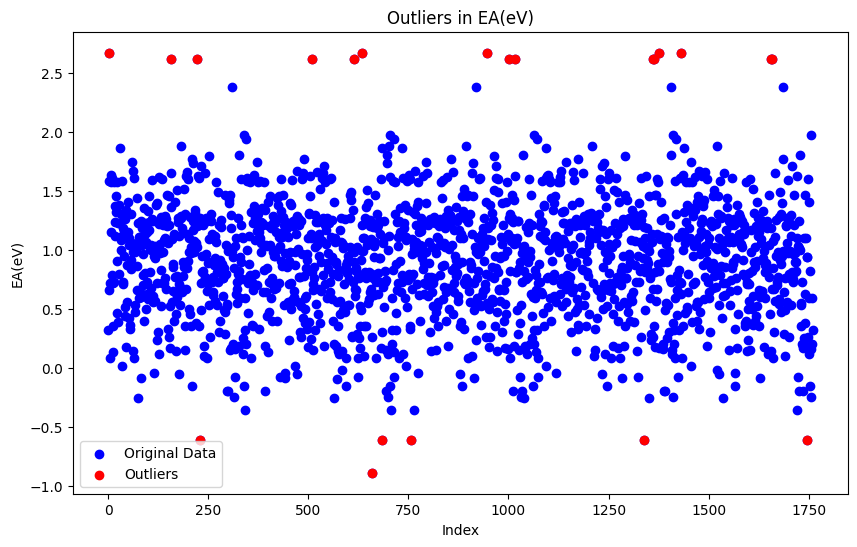

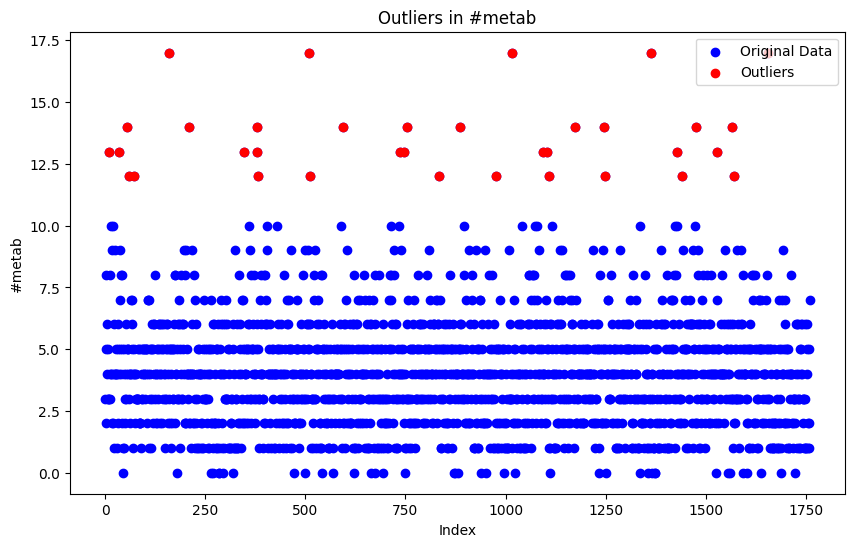

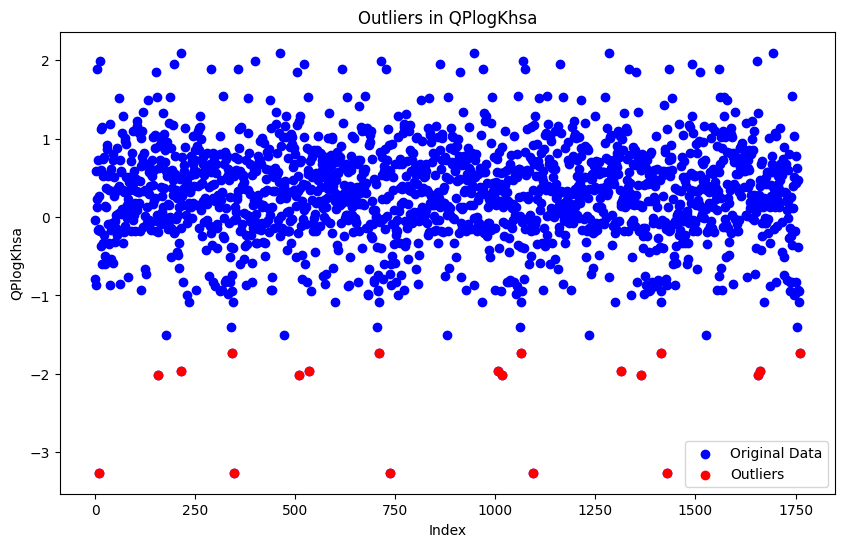

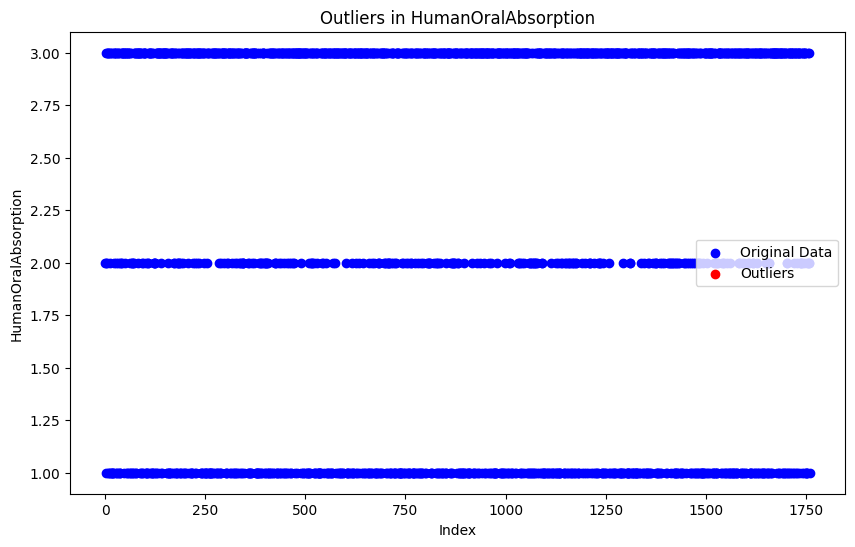

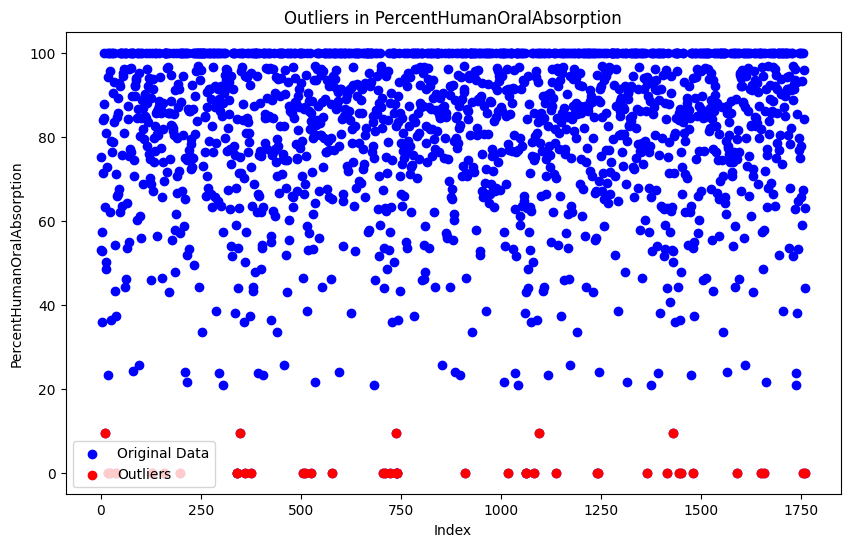

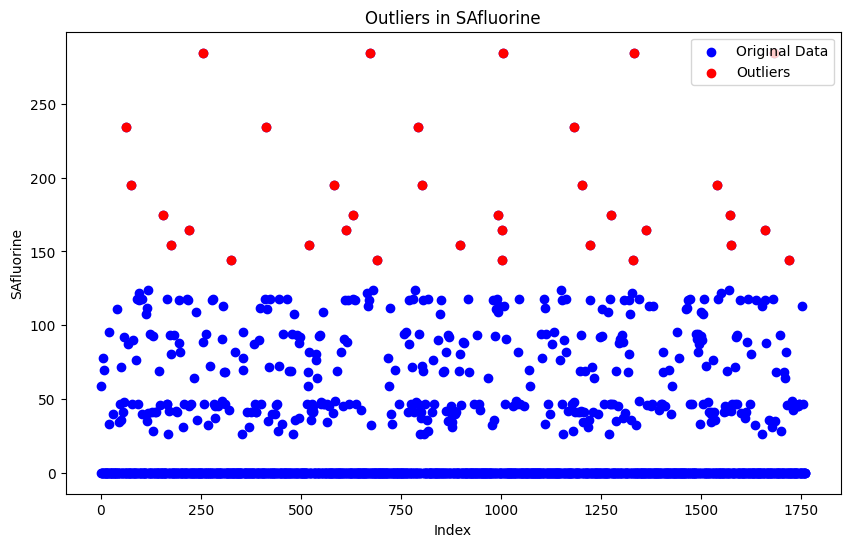

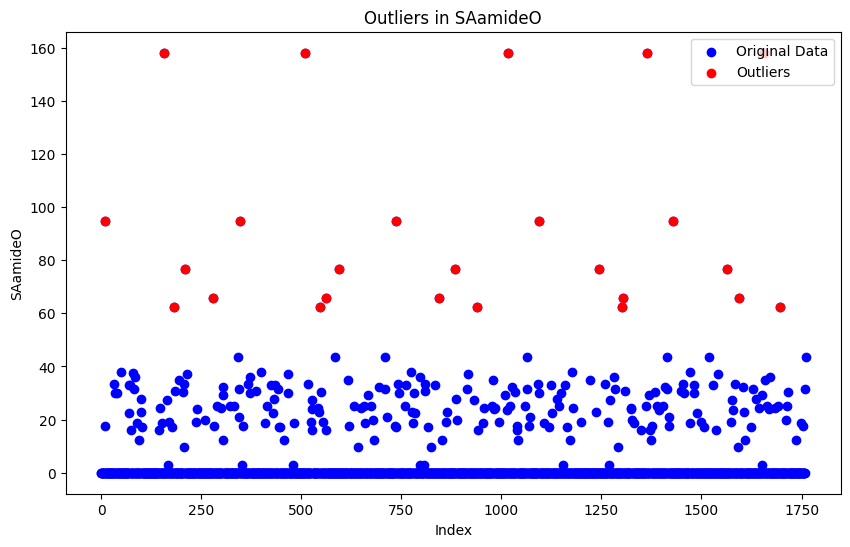

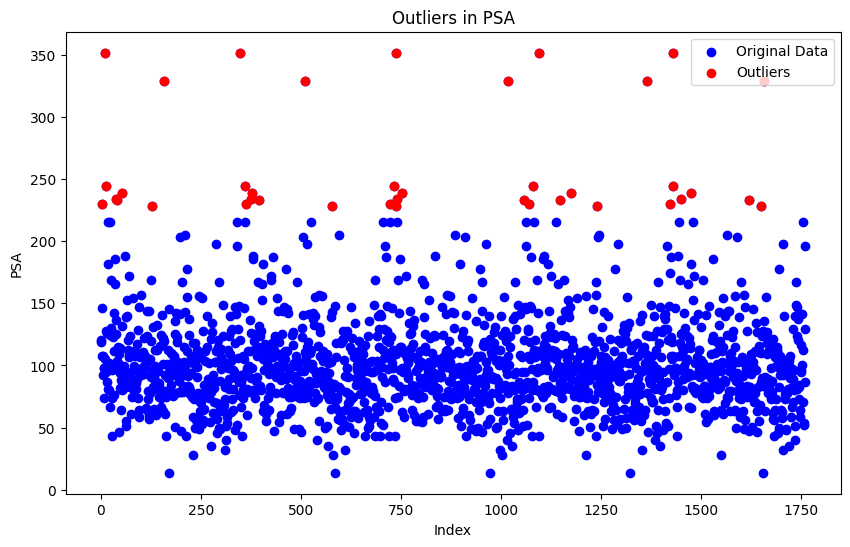

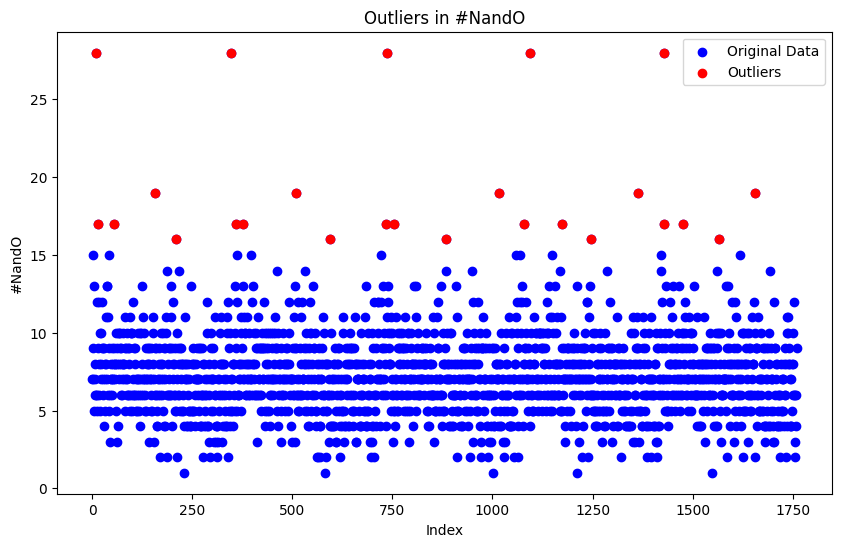

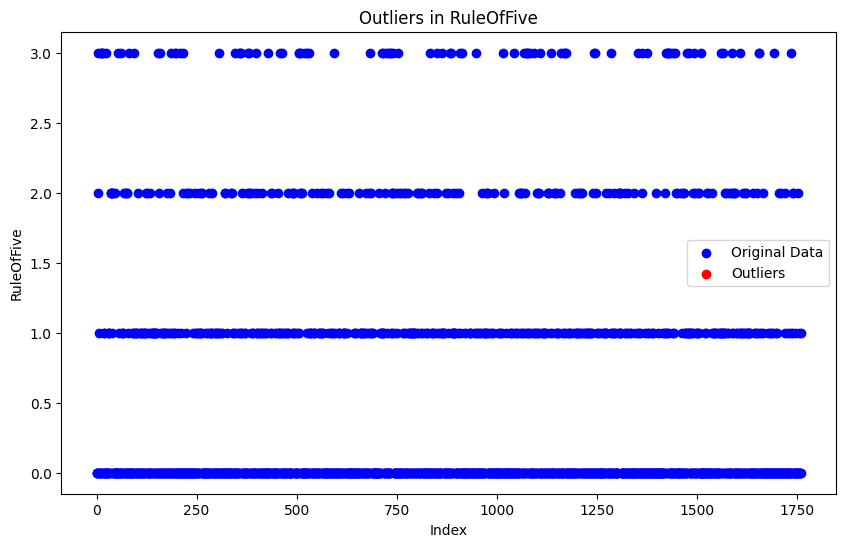

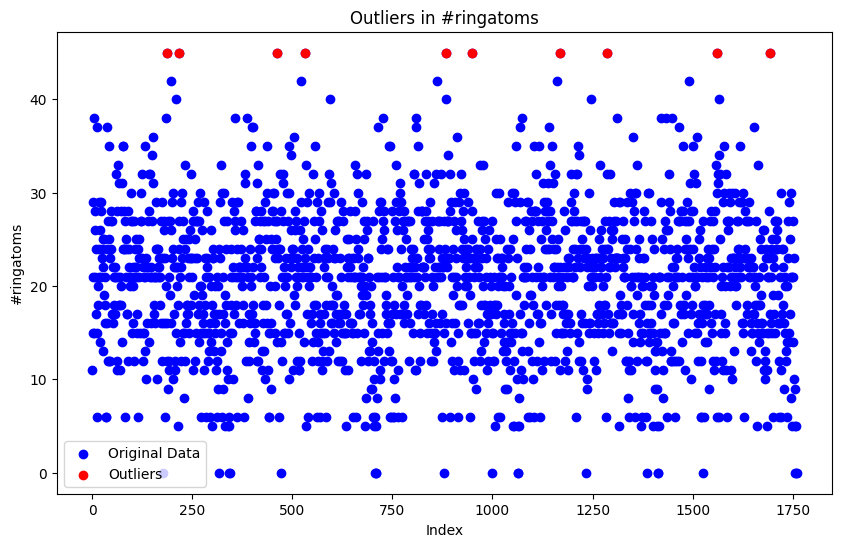

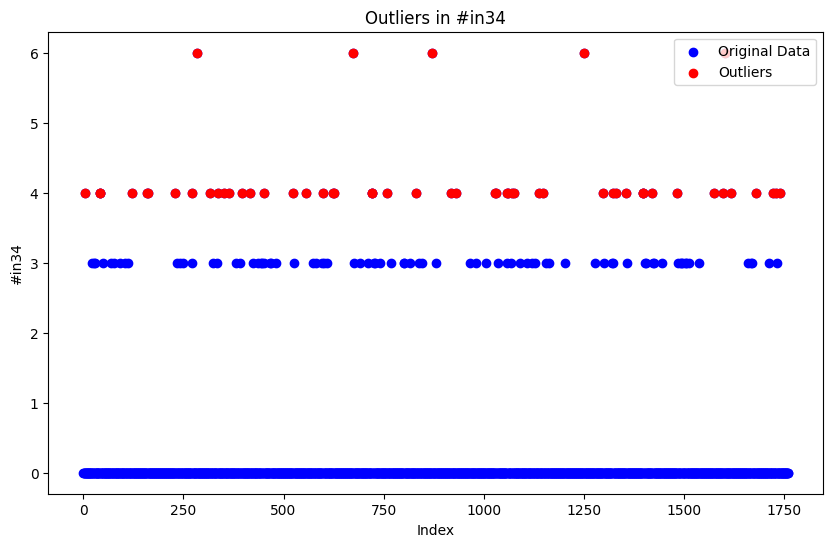

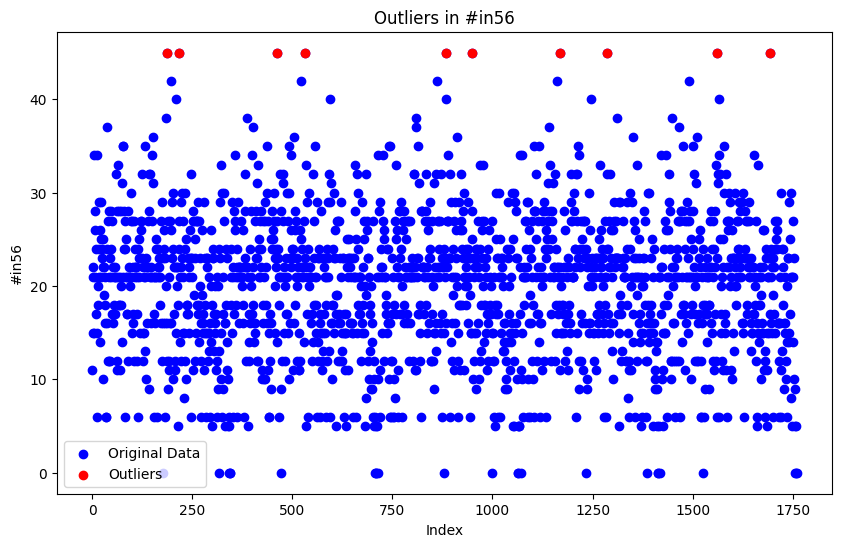

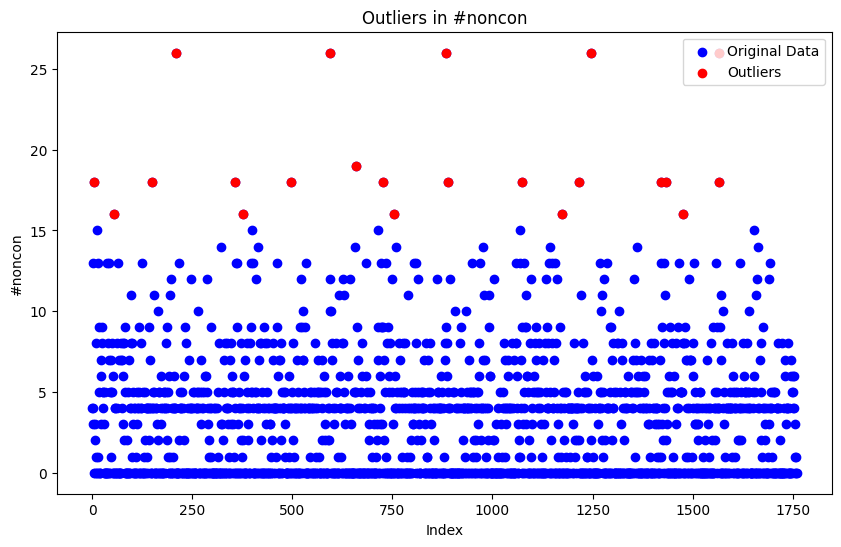

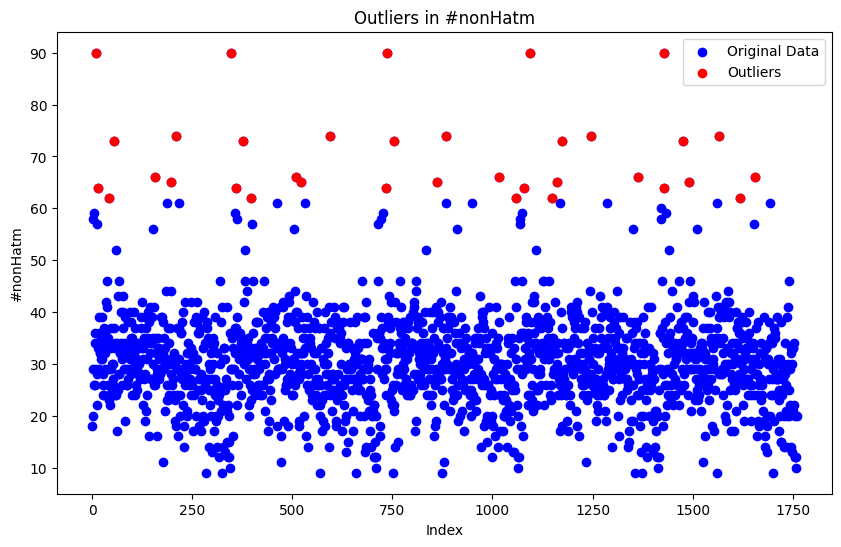

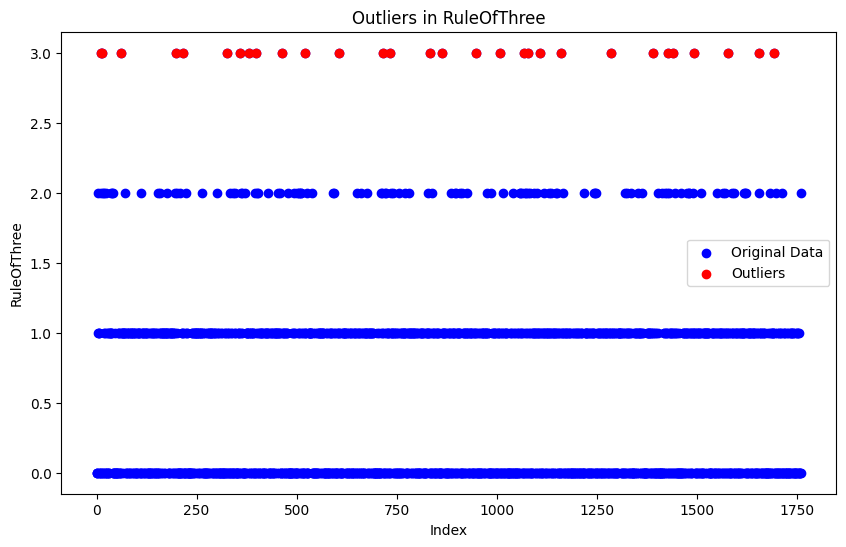

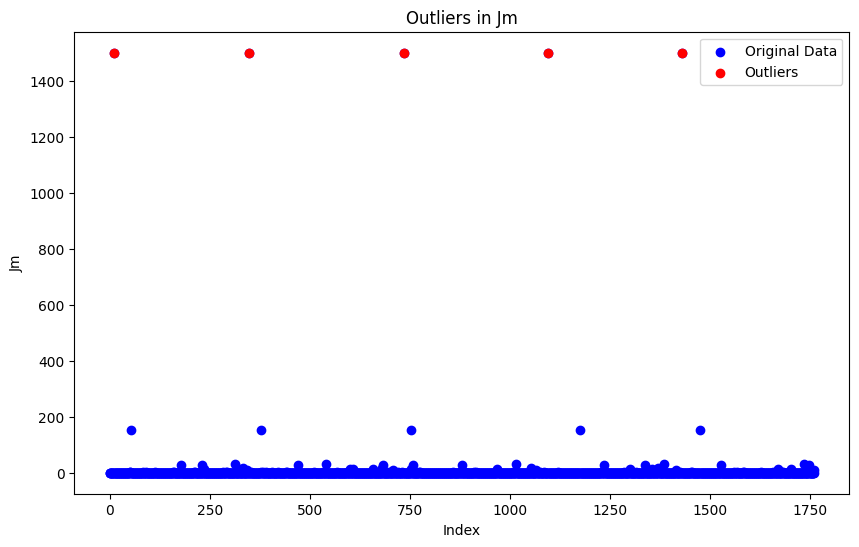

Number of outliers in #stars: 50
Number of outliers in #amine: 15
Number of outliers in #amidine: 17
Number of outliers in #acid: 28
Number of outliers in #amide: 15
Number of outliers in #rotor: 30
Number of outliers in #rtvFG: 29
Number of outliers in CNS: 0
Number of outliers in mol_MW: 35
Number of outliers in dipole: 5
Number of outliers in SASA: 30
Number of outliers in FOSA: 24
Number of outliers in FISA: 18
Number of outliers in PISA: 0
Number of outliers in WPSA: 14
Number of outliers in volume: 35
Number of outliers in donorHB: 14
Number of outliers in accptHB: 15
Number of outliers in dip^2/V: 25
Number of outliers in ACxDN^.5/SA: 29
Number of outliers in glob: 5
Number of outliers in QPpolrz: 25
Number of outliers in QPlogPC16: 35
Number of outliers in QPlogPoct: 25
Number of outliers in QPlogPw: 20
Number of outliers in QPlogPo/w: 10
Number of outliers in QPlogS: 15
Number of outliers in CIQPlogS: 20
Number of outliers in QPlogHERG: 30
Number of outliers in QPPCaco: 58
Num

In [8]:
from scipy import stats
import matplotlib.pyplot as plt

columns_to_check = ['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
                    'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
                    'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
                    'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
                    'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
                    'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
                    'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
                    'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
                    'RuleOfThree', 'Jm']

threshold = 3

outliers = {}
for column in columns_to_check:
    z_scores = np.abs(stats.zscore(df1[column]))
    outliers[column] = np.where(z_scores > threshold)[0]

data = df1.drop(np.concatenate(list(outliers.values())))

for column, indices in outliers.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(df1.index, df1[column], c='blue', label='Original Data')
    plt.scatter(indices, df1.iloc[indices][column], c='red', label='Outliers')
    plt.title(f'Outliers in {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

for column, indices in outliers.items():
    print(f"Number of outliers in {column}: {len(indices)}")

data.to_csv('cleaned_data.csv', index=False)


In [9]:
data = pd.read_csv('/content/cleaned_data.csv')

**HeatMap**

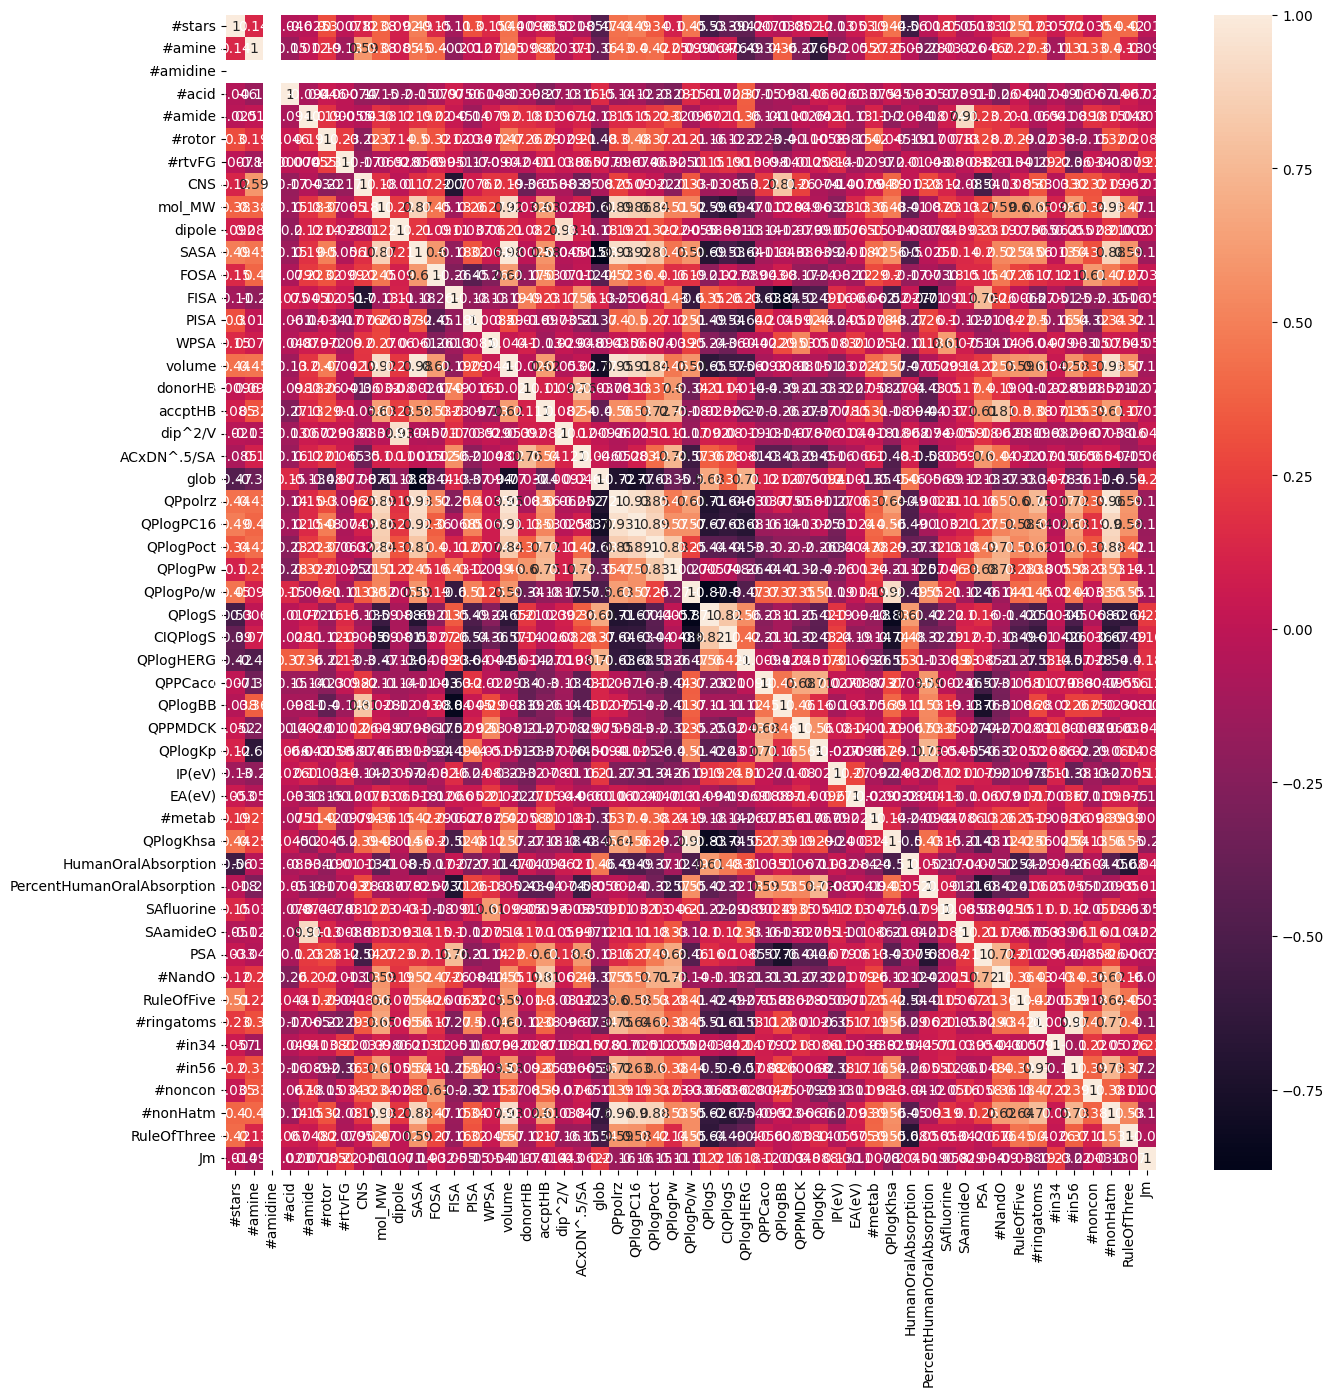

Top 12 positively correlated features:
volume      SASA          0.979696
SASA        volume        0.979696
#ringatoms  #in56         0.968875
#in56       #ringatoms    0.968875
#nonHatm    QPpolrz       0.964921
QPpolrz     #nonHatm      0.964921
            volume        0.953334
volume      QPpolrz       0.953334
QPlogPC16   QPpolrz       0.934930
QPpolrz     QPlogPC16     0.934930
dipole      dip^2/V       0.934391
dip^2/V     dipole        0.934391
dtype: float64


In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(data[['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
               'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
               'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
               'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
               'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
               'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
               'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
               'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
               'RuleOfThree', 'Jm']].corr(), annot=True)
plt.show()

correlation_matrix = data.corr()
top_positive_correlations = correlation_matrix.unstack().sort_values(ascending=False)

top_positive_correlations = top_positive_correlations[top_positive_correlations != 1]

top_12_positive_features = top_positive_correlations.head(12)

print("Top 12 positively correlated features:")
print(top_12_positive_features)


**Feature Selection**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_columns = ['Cell_Line','mol_MW','dipole','SASA','volume','dip^2/V','QPpolrz','QPlogPC16','#ringatoms','#in56','#nonHatm','Labels']

df = data[selected_columns]
X = df.drop('Labels', axis=1)
y = df['Labels']

**Applying SMOTE**

In [12]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X= X_resampled
y= y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


**RandomForestClassifier**

In [13]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

[I 2024-06-19 11:27:47,585] A new study created in memory with name: no-name-bc3ddea6-9d0d-4eea-b245-cf0b075f6ced
[I 2024-06-19 11:27:48,465] Trial 0 finished with value: 0.7975308641975308 and parameters: {'n_estimators': 56, 'max_depth': 12}. Best is trial 0 with value: 0.7975308641975308.
[I 2024-06-19 11:27:52,977] Trial 1 finished with value: 0.7958847736625515 and parameters: {'n_estimators': 171, 'max_depth': 14}. Best is trial 0 with value: 0.7975308641975308.
[I 2024-06-19 11:27:55,643] Trial 2 finished with value: 0.7382716049382716 and parameters: {'n_estimators': 173, 'max_depth': 6}. Best is trial 0 with value: 0.7975308641975308.
[I 2024-06-19 11:27:57,725] Trial 3 finished with value: 0.7967078189300412 and parameters: {'n_estimators': 115, 'max_depth': 16}. Best is trial 0 with value: 0.7975308641975308.
[I 2024-06-19 11:28:00,511] Trial 4 finished with value: 0.7695473251028807 and parameters: {'n_estimators': 157, 'max_depth': 8}. Best is trial 0 with value: 0.7975308

Best Hyperparameters: {'n_estimators': 64, 'max_depth': 17}
Test Accuracy: 0.782716049382716


**RF - RandomizedSearchCV**

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20)
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 13, 'n_estimators': 78}
Test Accuracy: 0.7975308641975308


In [15]:

random_forest_model = RandomForestClassifier(n_estimators=57, max_depth=14, random_state=42)

random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, predictions))

pickle_filename = 'random_forest_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f'Model saved as {pickle_filename}')

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       198
           1       0.82      0.77      0.79       207

    accuracy                           0.80       405
   macro avg       0.80      0.80      0.80       405
weighted avg       0.80      0.80      0.79       405

Model saved as random_forest_model.pkl


In [16]:
with open(pickle_filename, 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

def make_prediction(model, prompt):
    prediction = model.predict(prompt)
    return prediction
while True:
    user_input = input("Enter a comma-separated prompt (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    prompts = [float(value) for value in user_input.split(',')]
    result = make_prediction(loaded_rf_model, [prompts])
    print(f"Prediction for '{prompts}': {result}")

Enter a comma-separated prompt (or 'exit' to quit): 0,302.372,9.947,630.76,1079.77,0.0916253,33.142,10.767,6,6,22
Prediction for '[0.0, 302.372, 9.947, 630.76, 1079.77, 0.0916253, 33.142, 10.767, 6.0, 6.0, 22.0]': [0]
Enter a comma-separated prompt (or 'exit' to quit): 1,535.66,5.424,842.491,1598.935,0.0184029,55.597,17.144,27,27,38
Prediction for '[1.0, 535.66, 5.424, 842.491, 1598.935, 0.0184029, 55.597, 17.144, 27.0, 27.0, 38.0]': [1]
Enter a comma-separated prompt (or 'exit' to quit): exit


**confusion_matrix**

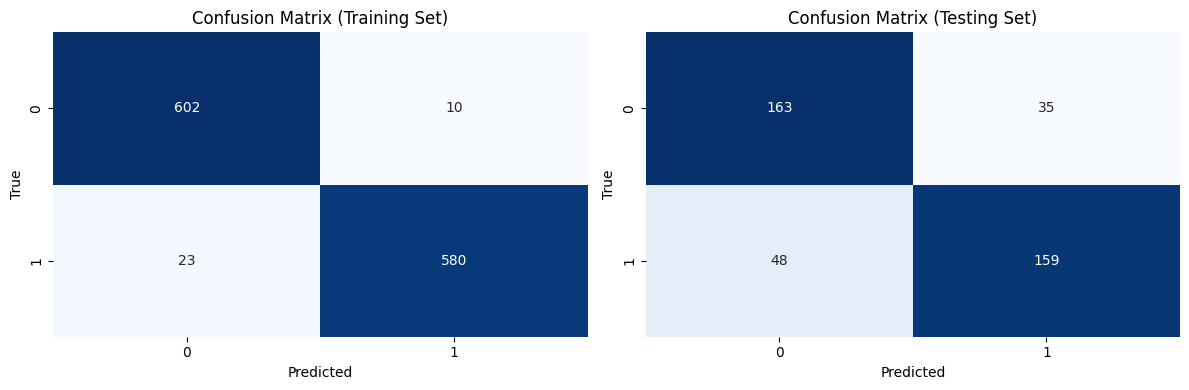

In [17]:
y_train_pred = random_forest_model.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Testing set
y_test_pred = random_forest_model.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Training Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Testing set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Testing Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Print the shape of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1215, 11)
y_train shape: (1215,)
X_test shape: (405, 11)
y_test shape: (405,)


In [19]:
accuracy = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / np.sum(conf_matrix_test)
print(f"Test Accuracy: {accuracy:.2%}")

accuracy = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / np.sum(conf_matrix_train)
print(f"Train Accuracy: {accuracy:.2%}")


Test Accuracy: 79.51%
Train Accuracy: 97.28%


In [20]:
Test_precision = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[0, 1])
print(f"Test Precision: {Test_precision:.2%}")

Train_precision = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[0, 1])
print(f"Train Precision: {Train_precision:.2%}")


Test Precision: 81.96%
Train Precision: 98.31%


In [21]:
Test_recall = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
print(f"Test Recall: {Test_recall:.2%}")

Train_recall = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
print(f"Train Recall: {Train_recall:.2%}")


Test Recall: 76.81%
Train Recall: 96.19%


In [22]:
Test_specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
print(f"Test_specificity: {Test_specificity:.2%}")


Train_specificity = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])
print(f"Train_specificity: {Train_specificity:.2%}")

Test_specificity: 82.32%
Train_specificity: 98.37%


In [23]:
f1_score_Test = 2 * (Test_precision * Test_recall) / (Test_precision + Test_recall)
print(f"f1_score: {f1_score_Test:.2%}")

f1_score_Train = 2 * (Train_precision * Train_recall) / (Train_precision + Train_recall)
print(f"f1_score: {f1_score_Train:.2%}")

f1_score: 79.30%
f1_score: 97.23%


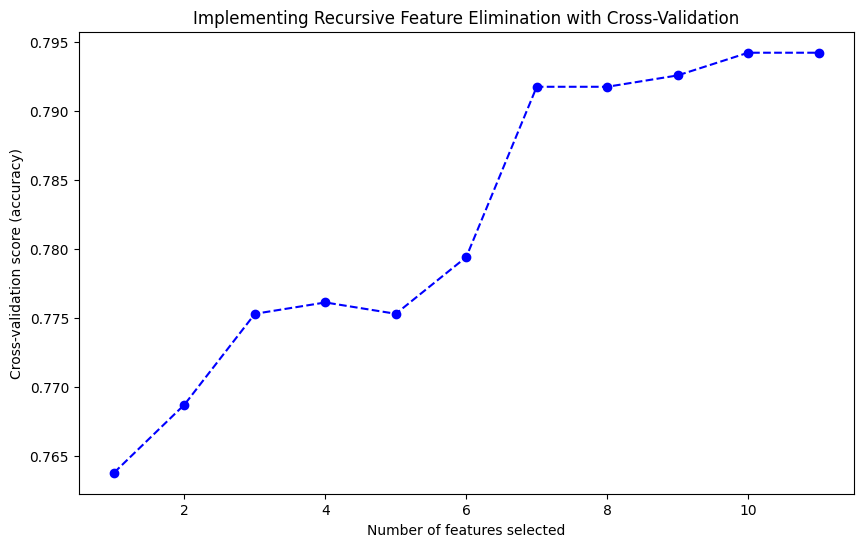

Selected Features: ['Cell_Line' 'mol_MW' 'dipole' 'SASA' 'volume' 'dip^2/V' 'QPpolrz'
 'QPlogPC16' '#ringatoms' '#nonHatm']


In [24]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

base_model = RandomForestClassifier(n_estimators=57, max_depth=14, random_state=42)

rfecv = RFECV(estimator=base_model, step=1, cv=StratifiedKFold(3), scoring='accuracy')

rfecv.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.title('Implementing Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')
plt.show()

selected_features = np.array(X.columns)[rfecv.support_]
print("Selected Features:", selected_features)


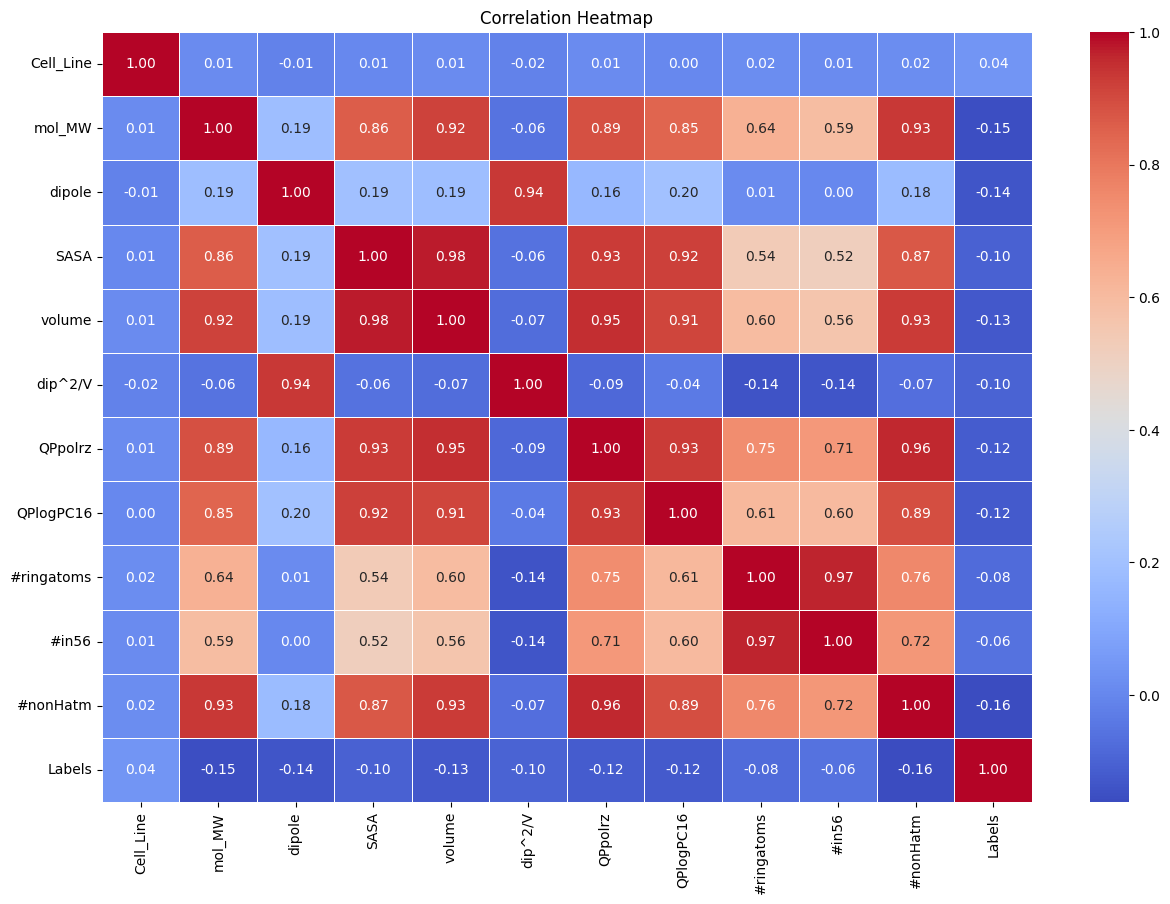

In [25]:
import seaborn as sns

correlation_data = pd.concat([X, y], axis=1)

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Random Forest

Accuracy: 0.80
Precision: 0.82
Recall: 0.77
F1-Measure: 0.79
AUC value: 0.85


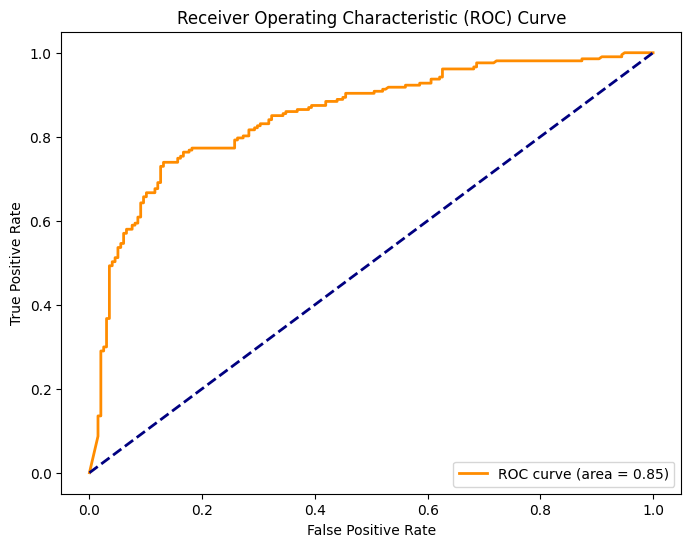

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, predictions)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, predictions)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, predictions)
print(f"F1-Measure: {f1:.2f}")

auc_value = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value:.2f}")

fpr, tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.58
Precision: 0.59
Recall: 0.57
F1-Measure: 0.58
AUC value: 0.63


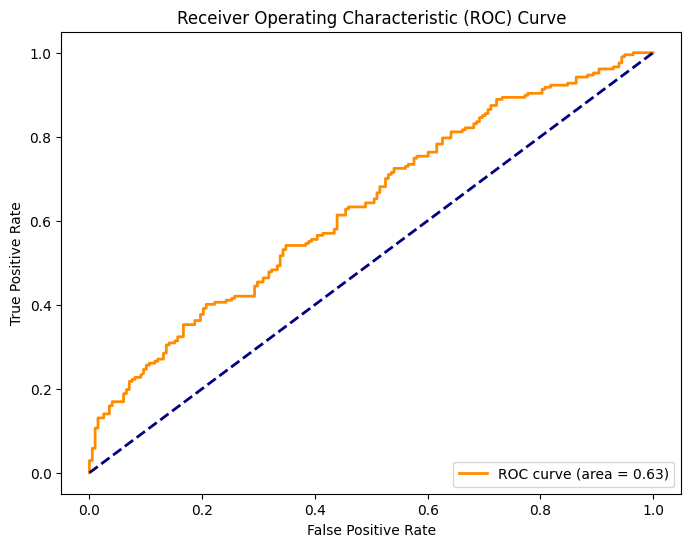

In [31]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)

logistic_regression_model.fit(X_train, y_train)

predictions_lr = logistic_regression_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

precision_lr = precision_score(y_test, predictions_lr)
print(f"Precision: {precision_lr:.2f}")

recall_lr = recall_score(y_test, predictions_lr)
print(f"Recall: {recall_lr:.2f}")

f1_lr = f1_score(y_test, predictions_lr)
print(f"F1-Measure: {f1_lr:.2f}")

auc_value_lr = roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_lr:.2f}")

fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **GaussianNB**

Accuracy: 0.55
Precision: 0.60
Recall: 0.36
F1-Measure: 0.45
AUC value: 0.55


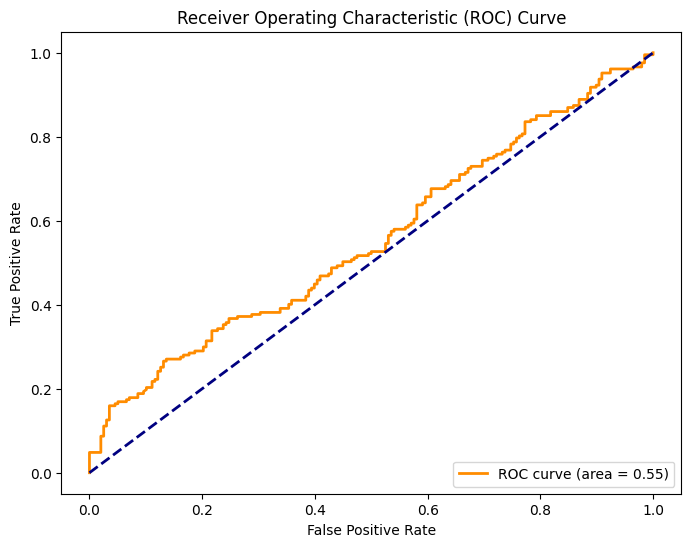

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

predictions_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f"Accuracy: {accuracy_nb:.2f}")

precision_nb = precision_score(y_test, predictions_nb)
print(f"Precision: {precision_nb:.2f}")

recall_nb = recall_score(y_test, predictions_nb)
print(f"Recall: {recall_nb:.2f}")

f1_nb = f1_score(y_test, predictions_nb)
print(f"F1-Measure: {f1_nb:.2f}")

auc_value_nb = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_nb:.2f}")

fpr_nb, tpr_nb, _ = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **KNeighborsClassifier**

Accuracy: 0.76
Precision: 0.78
Recall: 0.73
F1-Measure: 0.76
AUC value: 0.84


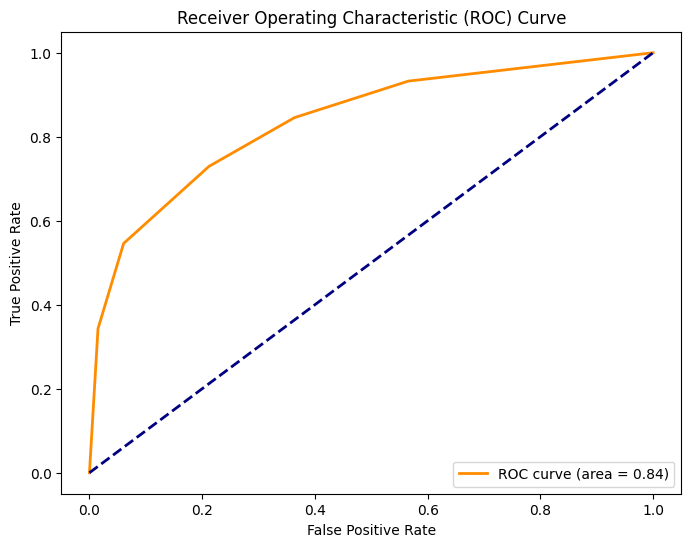

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

predictions_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

precision_knn = precision_score(y_test, predictions_knn)
print(f"Precision: {precision_knn:.2f}")

recall_knn = recall_score(y_test, predictions_knn)
print(f"Recall: {recall_knn:.2f}")

f1_knn = f1_score(y_test, predictions_knn)
print(f"F1-Measure: {f1_knn:.2f}")

auc_value_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_knn:.2f}")

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**SVC**

Accuracy: 0.54
Precision: 0.62
Recall: 0.24
F1-Measure: 0.34
AUC value: 0.55


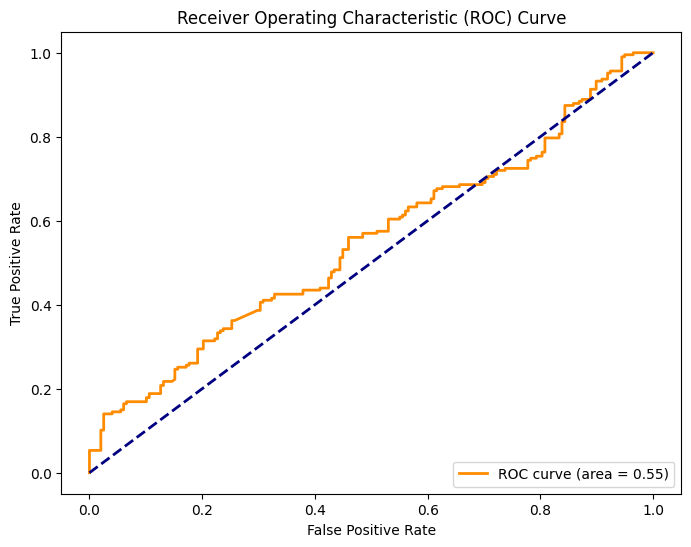

In [34]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)

svm_model.fit(X_train, y_train)

predictions_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

precision_svm = precision_score(y_test, predictions_svm)
print(f"Precision: {precision_svm:.2f}")

recall_svm = recall_score(y_test, predictions_svm)
print(f"Recall: {recall_svm:.2f}")

f1_svm = f1_score(y_test, predictions_svm)
print(f"F1-Measure: {f1_svm:.2f}")

auc_value_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value_svm:.2f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


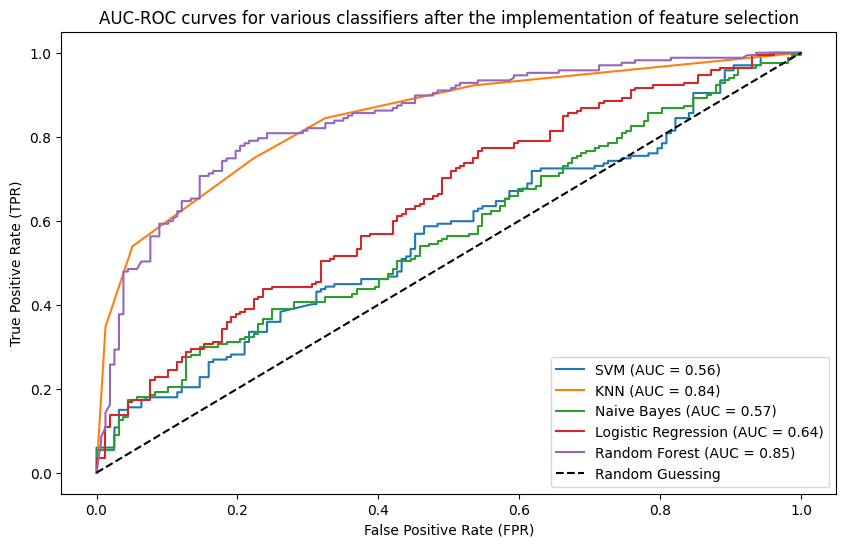

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=57, max_depth=14, random_state=42)
}

plt.figure(figsize=(10, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC curves for various classifiers after the implementation of feature selection')
plt.legend(loc='lower right')
plt.show()


**Cross Validation**

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=57, max_depth=14, random_state=42)
}

num_folds = [5, 10]

for folds in num_folds:
    print(f"\n{folds}-Fold Cross-Validation:")
    for name, clf in classifiers.items():
        kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
        print(f"{name} Mean Accuracy: {np.mean(scores):.2f} (Std Dev: {np.std(scores):.4f})")



5-Fold Cross-Validation:
SVM Mean Accuracy: 0.54 (Std Dev: 0.0226)
KNN Mean Accuracy: 0.78 (Std Dev: 0.0200)
Naive Bayes Mean Accuracy: 0.56 (Std Dev: 0.0181)
Logistic Regression Mean Accuracy: 0.57 (Std Dev: 0.0101)
Random Forest Mean Accuracy: 0.79 (Std Dev: 0.0268)

10-Fold Cross-Validation:
SVM Mean Accuracy: 0.53 (Std Dev: 0.0377)
KNN Mean Accuracy: 0.80 (Std Dev: 0.0168)
Naive Bayes Mean Accuracy: 0.56 (Std Dev: 0.0288)
Logistic Regression Mean Accuracy: 0.58 (Std Dev: 0.0310)
Random Forest Mean Accuracy: 0.80 (Std Dev: 0.0337)
